<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Reading Dataframe

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;"> Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<hr>  <p style="font-family: verdona;"><b>Observations :</b>
<br>No Null Records
<br>Levy feature is numerical but there is some string value in it which makes  its data type object
<hr>

In [4]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
df.describe(include=['O'])

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


<hr>  <p style="font-family: verdona;"><b> Observations :</b><br>Highly Imbalanced features :  Doors, Wheels<hr>

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">EDA & Data Cleaning

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Dropping duplicate records</center></b>

In [6]:
df[df.duplicated() == True].shape

(313, 18)

In [7]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [8]:
df[df.duplicated() == True].shape

(0, 18)

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Cleaning numeric features 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

<hr><p style="font-family: verdona;"><b>
Observation :</b><br>As seen above some features(Levy, Mileage, Engine Volume) can bee seen as numeric but are addressed as categorical type in .info method converting them to proper format<hr>

In [10]:
#extracting value which is making the 'Levy' feature object type
for unique in df['Levy'].unique():
    try : 
        int(unique)
    except:
        print(unique)

-


<hr><p style="font-family: verdona;"><b>
Conclusion : <br>
Levy -</b> This column refers to any additional taxes or fees associated with the vehicle.<br>
This means the rows with '-' value refers that there is no additional tax associated with that vehicle thus we'll replace it with 0.<hr>

In [11]:
df['Levy'] = df['Levy'].replace('-', 0)
df['Levy'] = df['Levy'].astype(int)
df['Levy'].dtype

dtype('int32')

In [12]:
# checking if all the records of Mileage feature contains km suffix
df[df['Mileage'].str.contains('km')].shape == df.shape

True

In [13]:
def mileage_handler(val):
    val = int(val[:-2].strip())
    return val

In [14]:
df['Mileage']= df['Mileage'].apply(mileage_handler)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Feature Engineering

In [15]:
#extracting value which is making the 'Engine Volume' feature object type
for unique in df['Engine volume'].unique():
    try : 
        float(unique)
    except:
        print(unique)

2.0 Turbo
2.2 Turbo
3.0 Turbo
1.4 Turbo
1.5 Turbo
1.6 Turbo
2.3 Turbo
2.8 Turbo
1.8 Turbo
2.4 Turbo
3.5 Turbo
3.2 Turbo
1.3 Turbo
2.5 Turbo
1.9 Turbo
4.4 Turbo
4.7 Turbo
0.2 Turbo
4.8 Turbo
4.6 Turbo
1.2 Turbo
1.7 Turbo
6.3 Turbo
2.7 Turbo
2.9 Turbo
4.0 Turbo
3.6 Turbo
3.7 Turbo
5.5 Turbo
2.1 Turbo
0.7 Turbo
0.6 Turbo
1.0 Turbo
4.5 Turbo
0.8 Turbo
4.2 Turbo
5.0 Turbo
5.7 Turbo
0.4 Turbo
5.4 Turbo
0.3 Turbo
1.1 Turbo


<hr><p style="font-family: verdona;"><b>
Conclusion : <br></b>
1. We can create two features <br>
&emsp;&emsp;1)"Engine Volume" which contains just the engine volume <br>
&emsp;&emsp;2)"Turbo" can be a binary feature determining the presence of Turbo(yes/no)
    <hr>

In [16]:
def eng_vol_handler():
    turbos = list()
    values = list()
    for val in df['Engine volume']:
        try : 
            val = float(val)
            turbo = 'No'
        except:
            val = val.split(' ')[0]
            turbo = 'Yes'
        turbos.append(turbo)
        values.append(val)
    return turbos,values

In [17]:
df['Turbo'], df['Engine Volume']= eng_vol_handler()
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,No,1.3


In [18]:
#now we can drop the old 'Engine volume variable
df.drop(columns=['Engine volume'], inplace=True)
df['Engine Volume'] = df['Engine Volume'].astype(float)
print(df['Engine Volume'].dtype)
df.head()

float64


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Handling Imbalanced features

In [19]:
#from df.describe we were able to figure out these two columns are highly imbalanced 
df['Doors'] = df['Doors'].map({'04-May':'4','02-Mar':'2', '>5': '5+'})
df['Wheel'] = df['Wheel'].map({'Right-hand drive': 'Right steer','Left wheel': 'Left steer'})

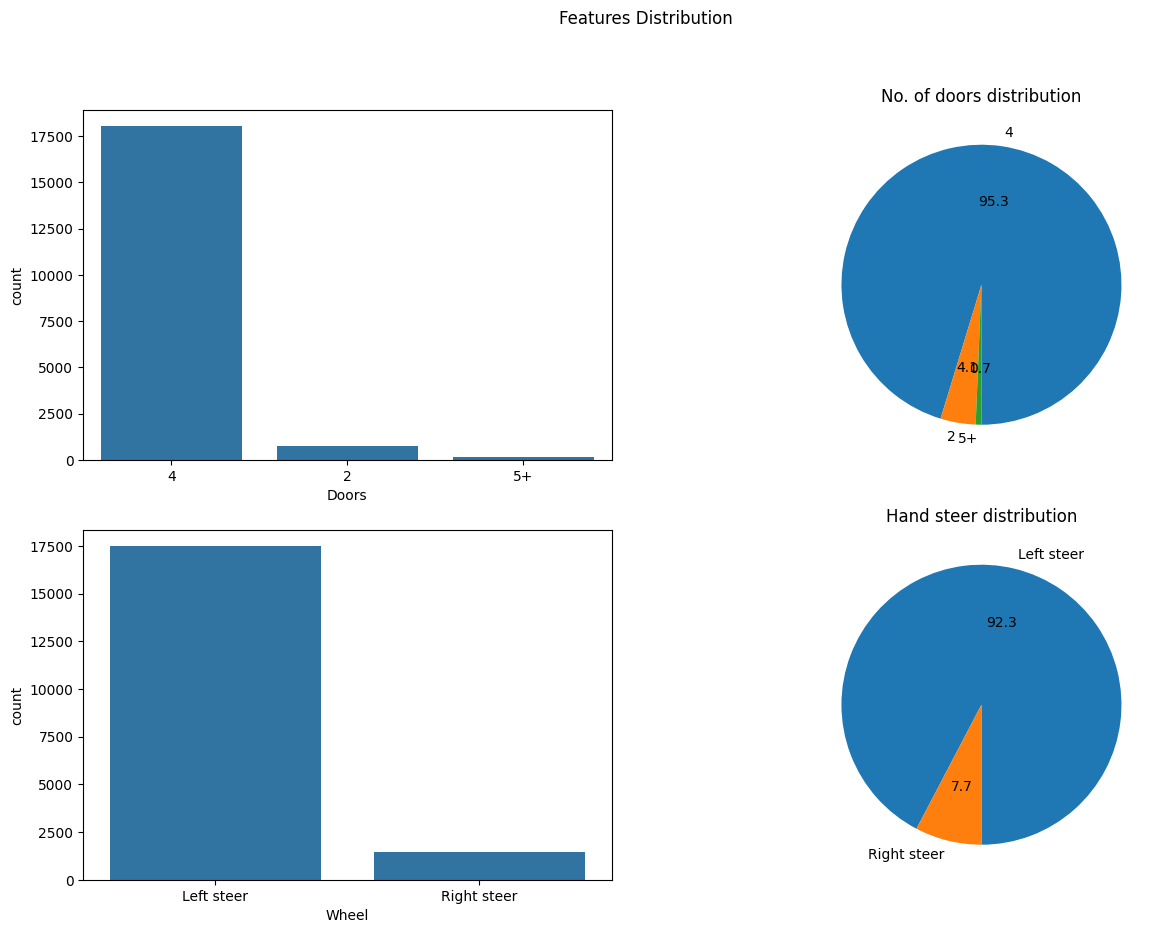

In [20]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
doors_dist = df['Doors'].value_counts()
wheels_dist = df['Wheel'].value_counts()
fig.suptitle('Features Distribution')
sns.countplot(x=df['Doors'], ax=axes[0,0])
sns.countplot(x=df['Wheel'], ax=axes[1,0])
axes[0,1].set_title('No. of doors distribution')
axes[0,1].pie(x=doors_dist.values,labels=doors_dist.index, autopct='%.1f',startangle=270)
axes[1,1].set_title('Hand steer distribution')
axes[1,1].pie(x=wheels_dist.values,labels=wheels_dist.index, autopct='%.1f',startangle=270)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
1. Doors feature has three uniques and majority distribution is occupied the value '4' leaving less than 1% records with value '5+' and less than 5% records with value '2'.<br>
2. Wheels feature is a binary feature where Left hand steer has majority distribution but Right hand steer also has significant distribution.
<p style="font-family: verdona;">
<b>Conclusion : </b><br>
1. Dropping features with more than 95% imbalance i.e. Doors feature<hr>

In [21]:
df.drop(columns=['Doors'], inplace=True)
df['Wheel'] = df['Wheel'].map({'Right steer': 1,'Left steer': 0})
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Visualizing numeric features

In [22]:
numeric_features = list()
for col in df.columns:
    col_dtype = df[col].dtype
    if col_dtype != 'object':
        numeric_features.append(col)
numeric_features.pop(1)
numeric_features

['ID',
 'Levy',
 'Prod. year',
 'Mileage',
 'Cylinders',
 'Wheel',
 'Airbags',
 'Engine Volume']

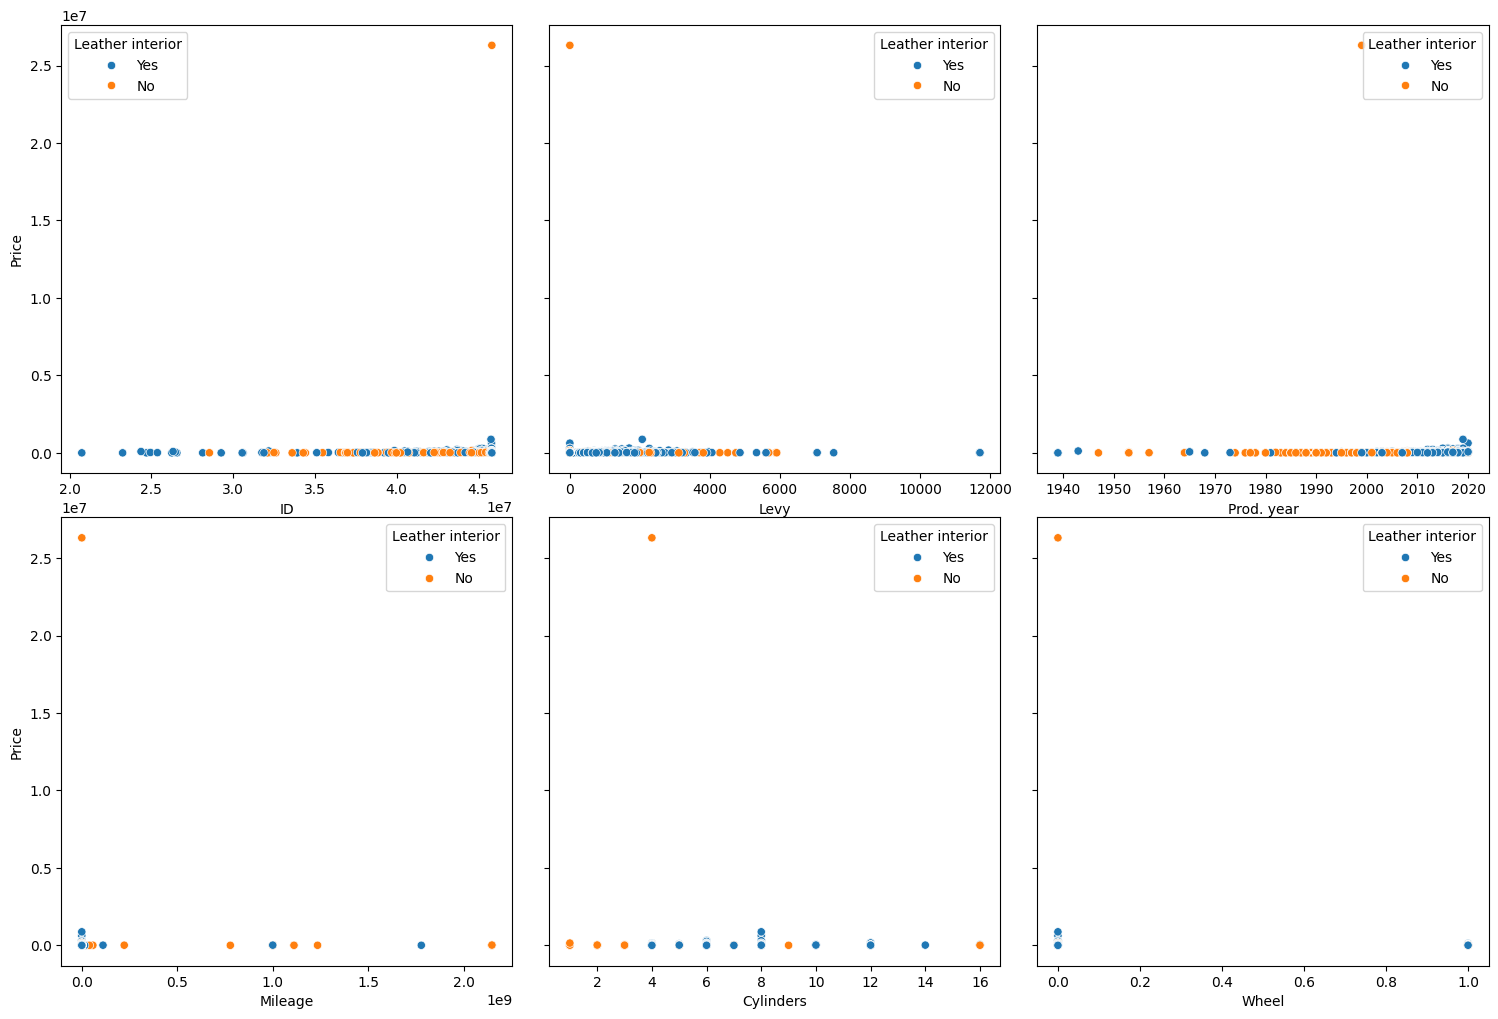

In [23]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(2):
    for j in range(3):
        try:
            sns.scatterplot(x=df[numeric_features[current_col]], y=df['Price'],hue=df['Leather interior'], ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<hr>  <p style="font-family: verdona;"><b> Observations :</b><br>Outliers detected which are restricting from getting insights from data
<p style="font-family: verdona;"><b> Conclusion :</b><br>We will first drop only the target feature outlier then we will see if the outliers exist in the other features as well and take steps accordingly<hr>

In [24]:
df[df['Price'] > 0.5e7]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
16729,45812886,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,99999,4.0,Manual,Front,0,Blue,0,No,1.7


In [25]:
df = df[df['Price'] < 0.5e7]
print(df.shape)
df.head()

(18923, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


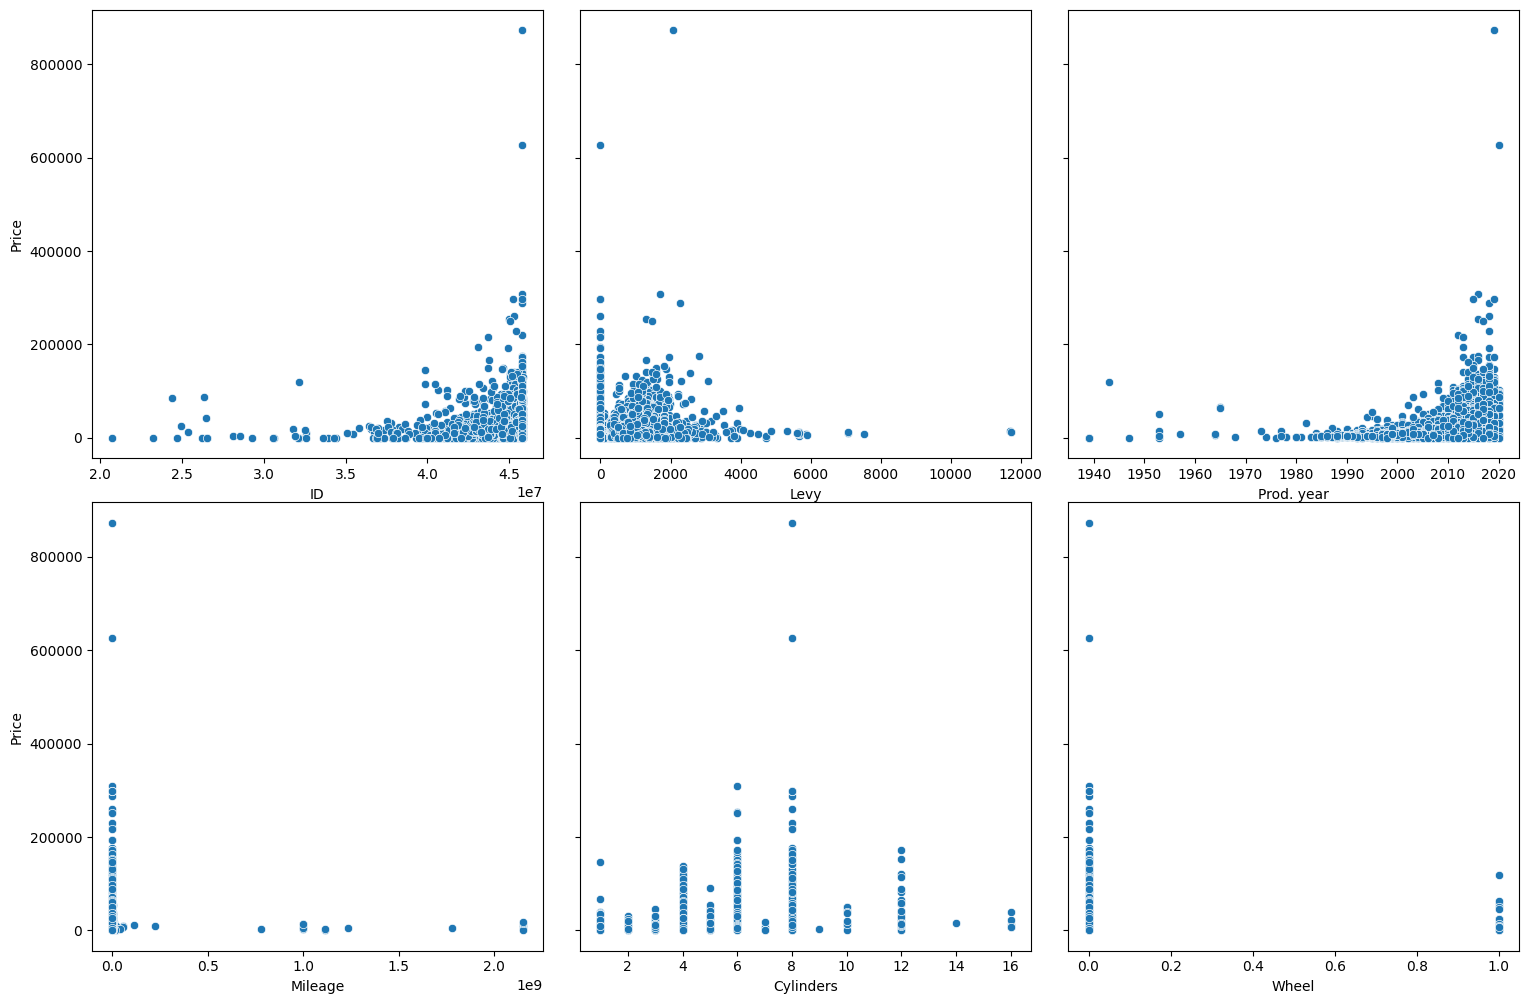

In [26]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(2):
    for j in range(3):
        try:
            sns.scatterplot(x=df[numeric_features[current_col]], y=df['Price'], ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

In [27]:
df[df['Price'] > 600000]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
1224,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,0,8.0,Tiptronic,4x4,0,Black,12,Yes,6.3
8456,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,2531,8.0,Tiptronic,4x4,0,Black,0,No,4.0


In [28]:
df = df[df['Price'] < 600000]
print(df.shape)
df.head()

(18921, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


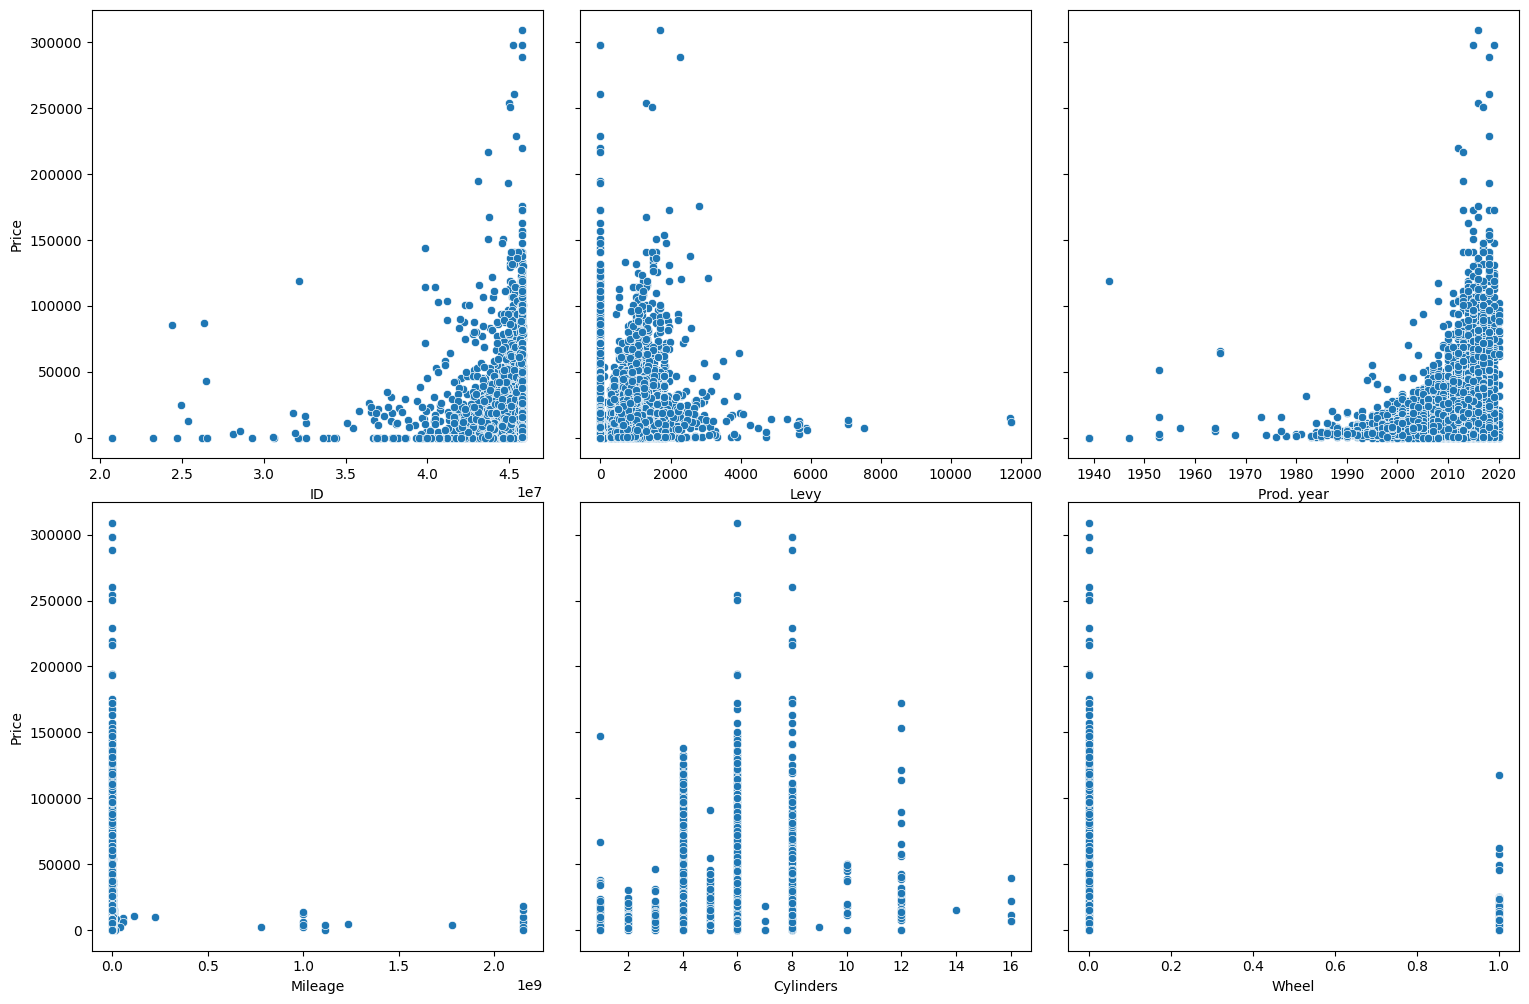

In [29]:
# now we can plot the numerical features and see their correlation with the target feature
fig, axes = plt.subplots(2, 3, figsize=(15,10), sharey='all')
fig.tight_layout() 
current_col = 0
for i in range(2):
    for j in range(3):
        try:
            sns.scatterplot(x=df[numeric_features[current_col]], y=df['Price'],ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<hr>  <p style="font-family: verdona;">Now we have eliminated all the extreme outliers in the Target feature with visual analysis<hr>

<p style="font-family: verdona;">
<br>1)The ID feature shows correlation i.e. when the IDs are low the the price of the car is also on the lower side
<br>➤If we wouldve known on what basis the IDs have been assigned :<br>
&emsp;&emsp;✦We must check if the data is not sorted as per IDs, which can affect the data if splitted without shhuffling and shuffle it<br>
➤But since we dont know and supposing IDs are assigned as per the order of scrapping .<br>
&emsp;&emsp;✦We will drop the feature as it will lead the model to misinterpret prices affected by the IDs.<br>


In [30]:
df.drop(columns=['ID'],inplace=True)
numeric_features.remove('ID')
print(df.shape)
df.head()

(18921, 17)


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Outlier Handling

In [31]:
df[numeric_features]

,Levy,Prod. year,Mileage,Cylinders,Wheel,Airbags,Engine Volume
0,1399,2010,186005,6.0,0,12,3.5
1,1018,2011,192000,6.0,0,8,3.0
2,0,2006,200000,4.0,1,2,1.3
3,862,2011,168966,4.0,0,0,2.5
4,446,2014,91901,4.0,0,4,1.3
...,...,...,...,...,...,...,...
18919,0,1999,300000,4.0,0,5,2.0
18920,831,2011,161600,4.0,0,8,2.4
18921,836,2010,116365,4.0,0,4,2.0
18922,1288,2007,51258,4.0,0,4,2.0


<hr> <p style="font-family: verdona;">
extracting only continous values features
<hr>

In [32]:
numeric_features.remove('Cylinders')
numeric_features.remove('Airbags')
numeric_features.remove('Wheel')

<hr> <p style="font-family: verdona;">
now we can plot the numerical features and see their respective outliers
<hr>

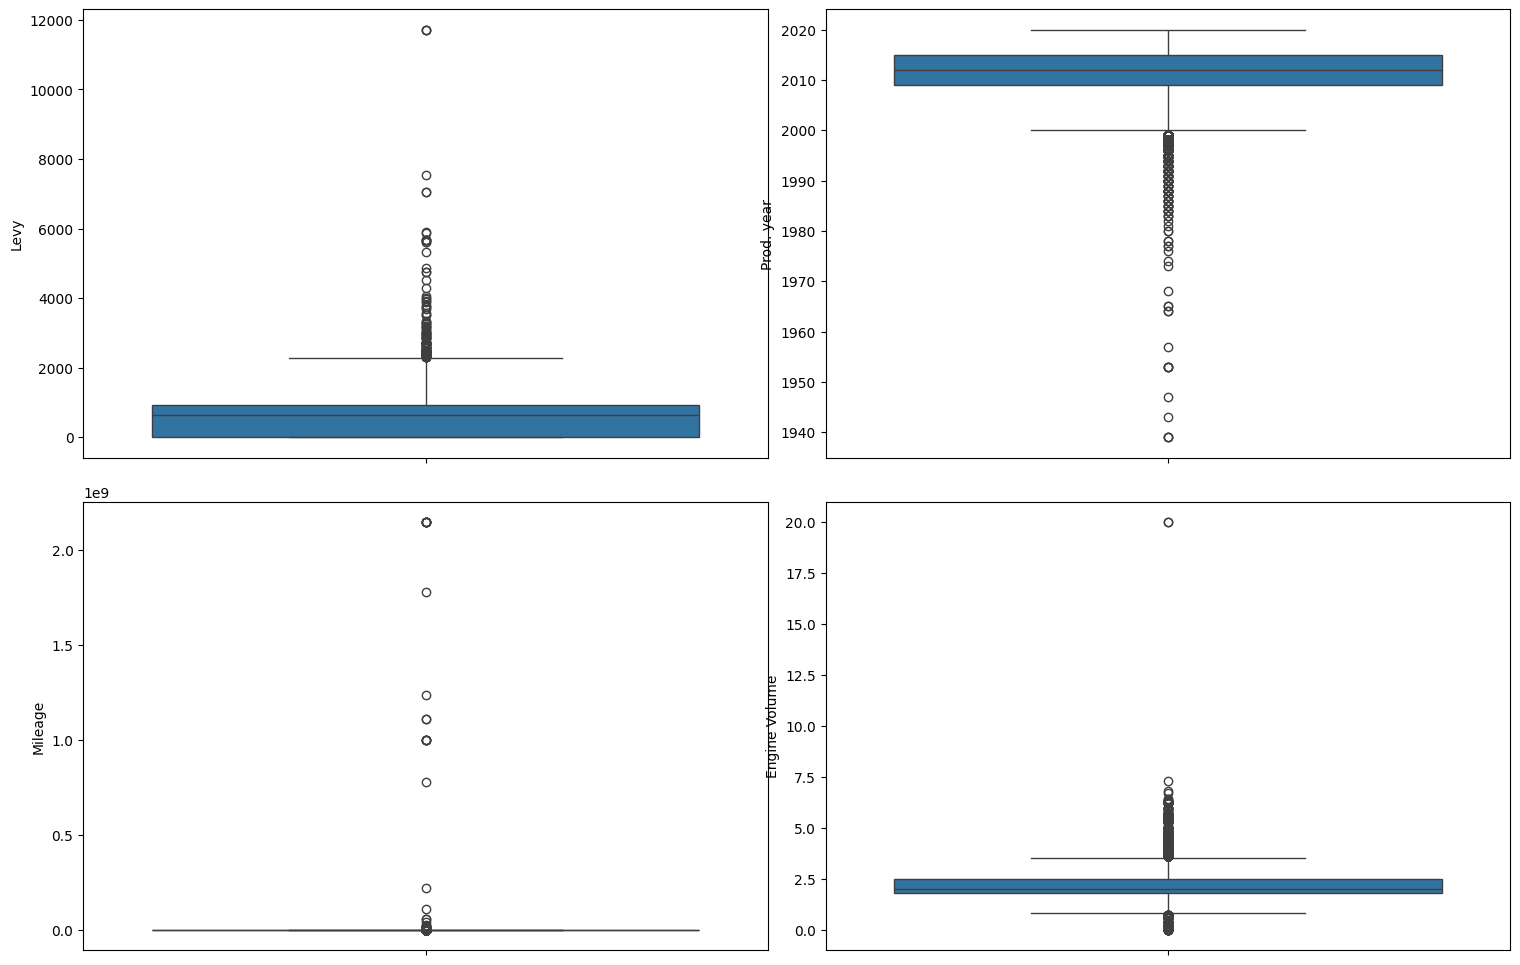

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
fig.tight_layout() 
current_col = 0
for i in range(2):
    for j in range(2):
        try:
            sns.boxplot(y=df[numeric_features[current_col]],ax=axes[i,j])
            current_col+=1
        except:
            pass
plt.show()

<hr><p style="font-family: verdona;">Using IQR method to handle Outliers
<hr>

In [34]:
def Outlier_counter(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    outliers = len(data[(data[col] < lower_bound) | (data[col] > upper_bound)])
    return outliers, lower_bound, upper_bound

In [35]:
# Too time taking to plot 

# fig, ax = plt.subplots(ncols=3, nrows=(len(numeric_features)+1)//3, figsize=(15,10))
# axes = ax.flatten()
# try:
#     for i in range(len(numeric_features)):  # Go through all the continuous columns
#         sns.histplot(x=df[numeric_features[i]], ax=axes[i], color='c', kde=True)
#         outlier, lb, ub = Outlier_counter(df, numeric_features[i])
#         title = f'No. of outliers:  {outlier}'
#         axes[i].set_title(title, color='r')
#         axes[i].axvline(lb, c='c', linestyle='--', label='Lower bound')
#         axes[i].axvline(ub, c='r', linestyle='--', label='Upper bound')
#         plt.subplots_adjust(hspace=0.5, wspace=0.5)
#     plt.savefig('Outlier_plot.png')
#     plt.show()
# except IndexError:
#     pass

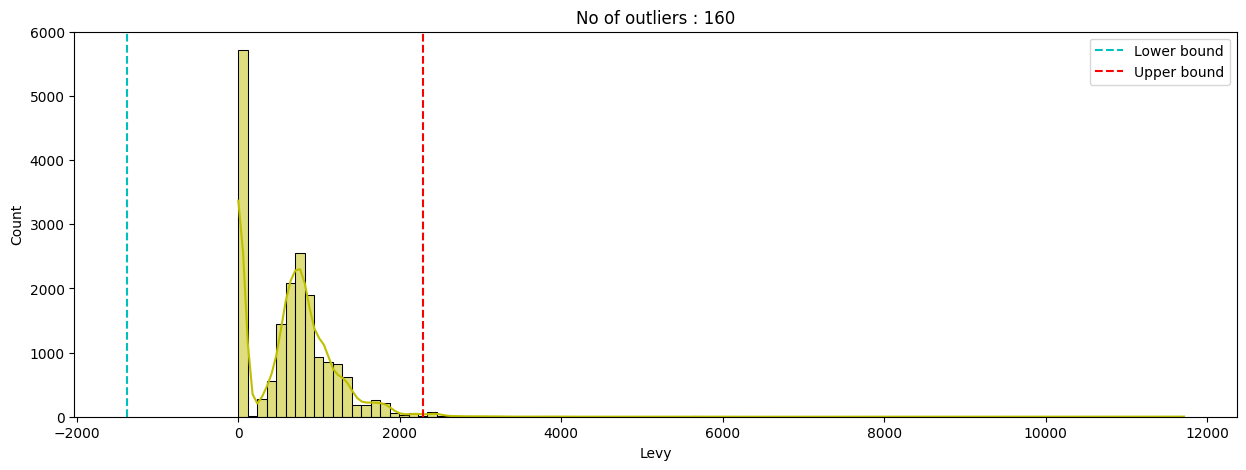

In [36]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[0]],color='y', kde=True, bins=100)
outliers_cnt, lb, ub = Outlier_counter(df, numeric_features[0])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

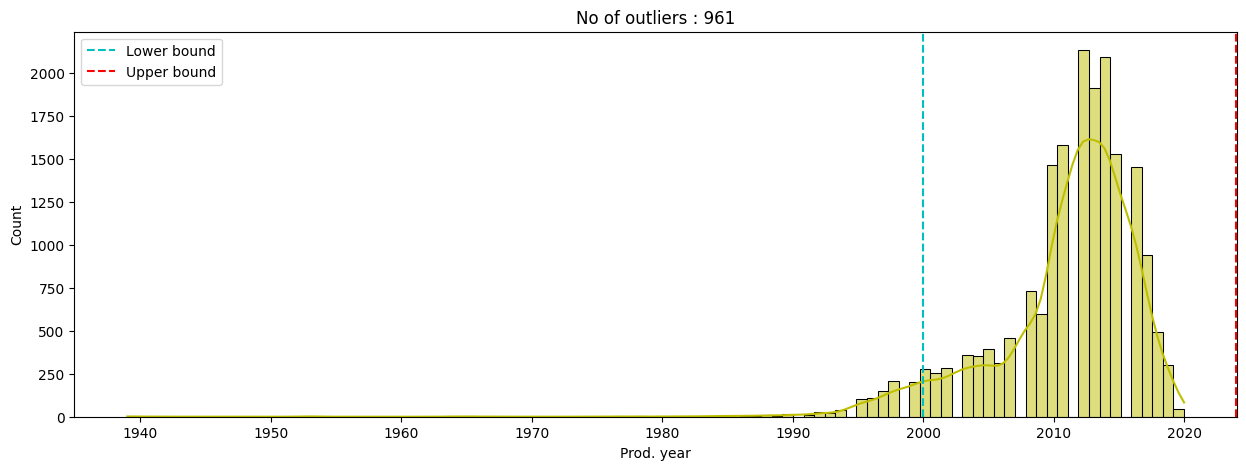

In [37]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[1]],color='y', kde=True, bins=100)
outliers_cnt, lb, ub = Outlier_counter(df, numeric_features[1])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

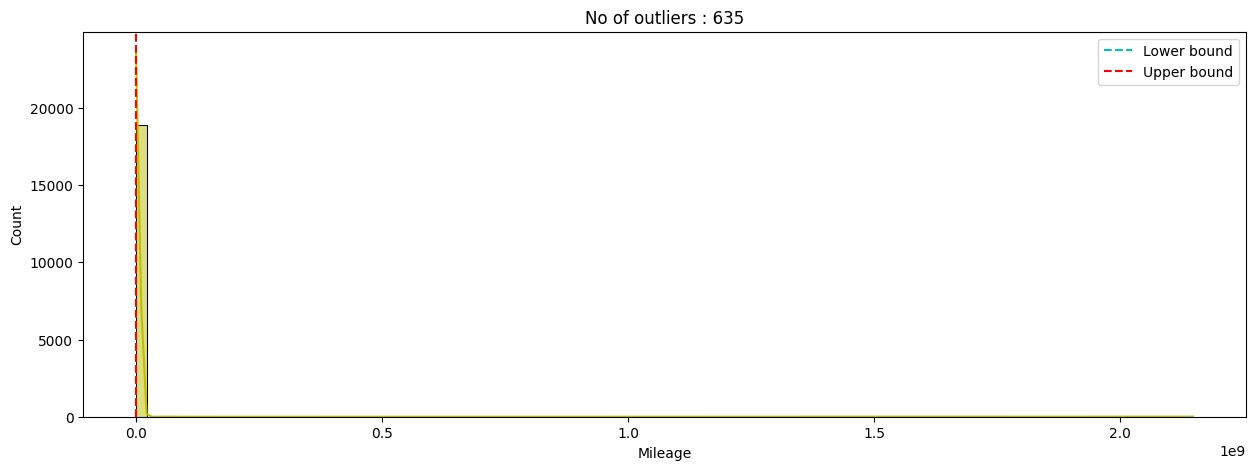

In [38]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[2]],color='y', kde=True, bins=100)
outliers_cnt, lb, ub = Outlier_counter(df, numeric_features[2])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

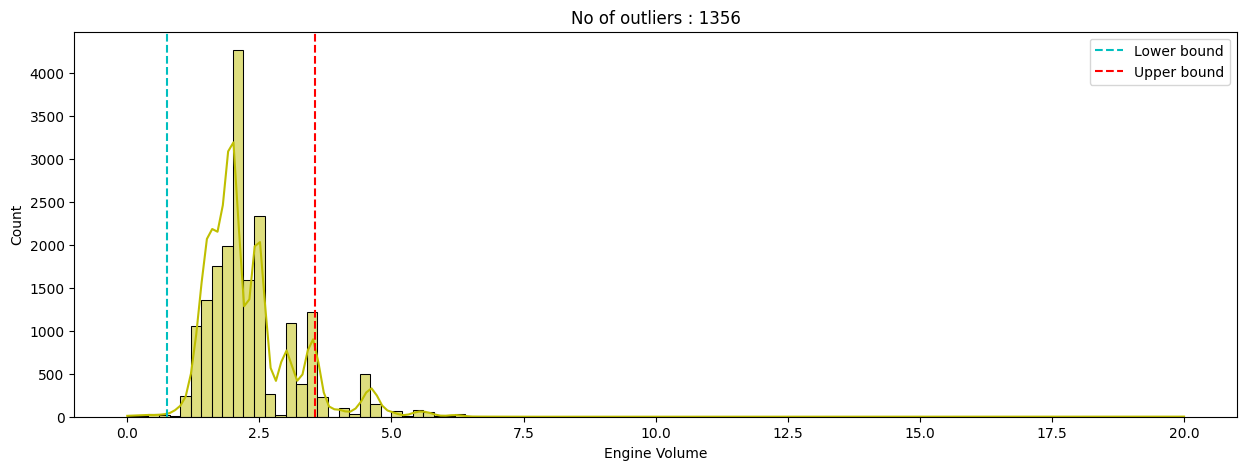

In [39]:
plt.figure(figsize=(15,5))
sns.histplot(df[numeric_features[3]],color='y', kde=True, bins=100)
outliers_cnt, lb, ub = Outlier_counter(df, numeric_features[3])
plt.title(f'No of outliers : {outliers_cnt}')
plt.axvline(lb, c='c', linestyle='--', label='Lower bound')
plt.axvline(ub, c='r', linestyle='--', label='Upper bound')
plt.legend()
plt.show()

In [40]:
def Outlier_trimmer(data, col):
    q1 = np.percentile(data[col], 25)
    q3 = np.percentile(data[col], 75)
    IQR = q3-q1
    lower_bound = q1-IQR*1.5
    upper_bound = q3+IQR*1.5
    data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]
    return data

In [41]:
new_df = df.copy()

In [42]:
for i in numeric_features:
    new_df = Outlier_trimmer(new_df, i)   
    print(new_df.shape)

(18761, 17)
(17535, 17)
(16898, 17)
(15762, 17)


In [43]:
new_df.reset_index(inplace=True)
new_df.drop(columns=['index'],inplace=True)
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">checking if any imbalanced data is affected by trimming<hr>

In [44]:
lost = pd.DataFrame(columns=['Column', 'Old Data', 'New Data', 'Uniques Lost', 'Data Type'])
for col in df.columns:
    dtype = df[col].dtype
    diff = len(df[col].unique()) - len(new_df[col].unique())
    lost.loc[len(lost.index)] = [col, len(df[col].unique()), len(new_df[col].unique()), diff, dtype]
lost

,Column,Old Data,New Data,Uniques Lost,Data Type
0,Price,2312,2203,109,int64
1,Levy,559,374,185,int32
2,Manufacturer,64,54,10,object
3,Model,1588,1236,352,object
4,Prod. year,54,20,34,int64
5,Category,11,11,0,object
6,Leather interior,2,2,0,object
7,Fuel type,7,7,0,object
8,Mileage,7686,6749,937,int64
9,Cylinders,13,12,1,float64


<hr><p style="font-family: verdona;"> We can see there is no complete elimination of a single class where the data type is object and the number of uniques is less, this denotes the IQR method is a good approach for this case<hr>

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Visualizing categorical features

<hr><p style="font-family: verdona;">
Analyzing "Color" variable<br>
organizing value counts in a way they are easy to visualize
<hr>

C:\Users\antho\AppData\Local\Temp\ipykernel_13792\2613311352.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


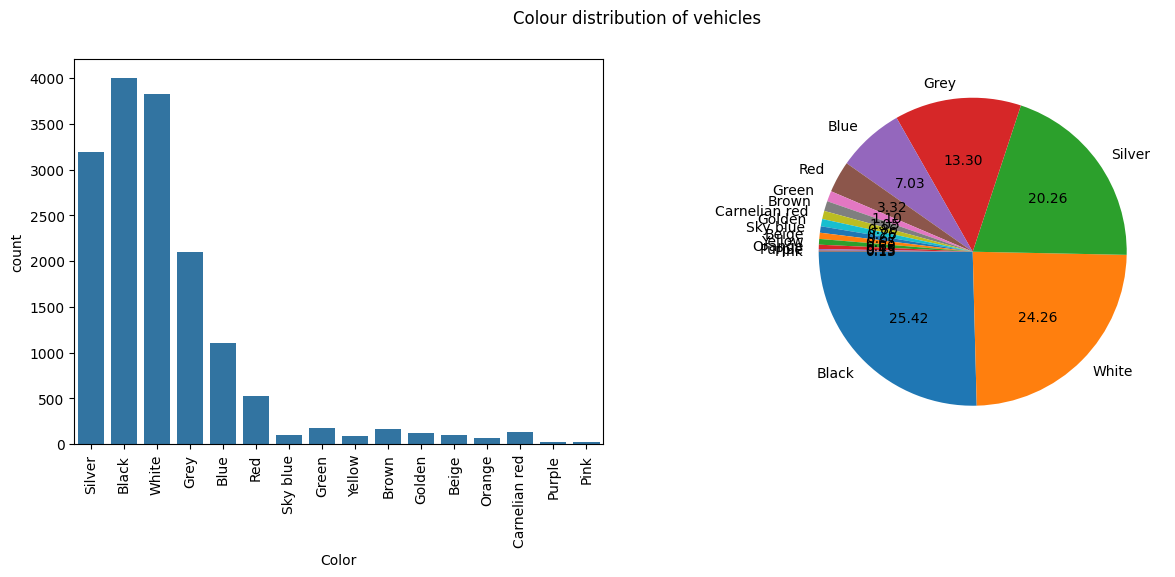

In [45]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.countplot(x=new_df['Color'], ax=axes[0])
colors_vc = new_df['Color'].value_counts()
fig.suptitle('Colour distribution of vehicles')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[1].pie(x=colors_vc.values, labels=colors_vc.index, autopct='%.2f',
            startangle=180)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
The distribution of colours is uneven, few colours share a very small proportion of the distribution.

<p style="font-family: verdona;"><b>Conclusion :</b><br>
We can group the colours sharing less then 1% length of the entire data as Others.<hr>

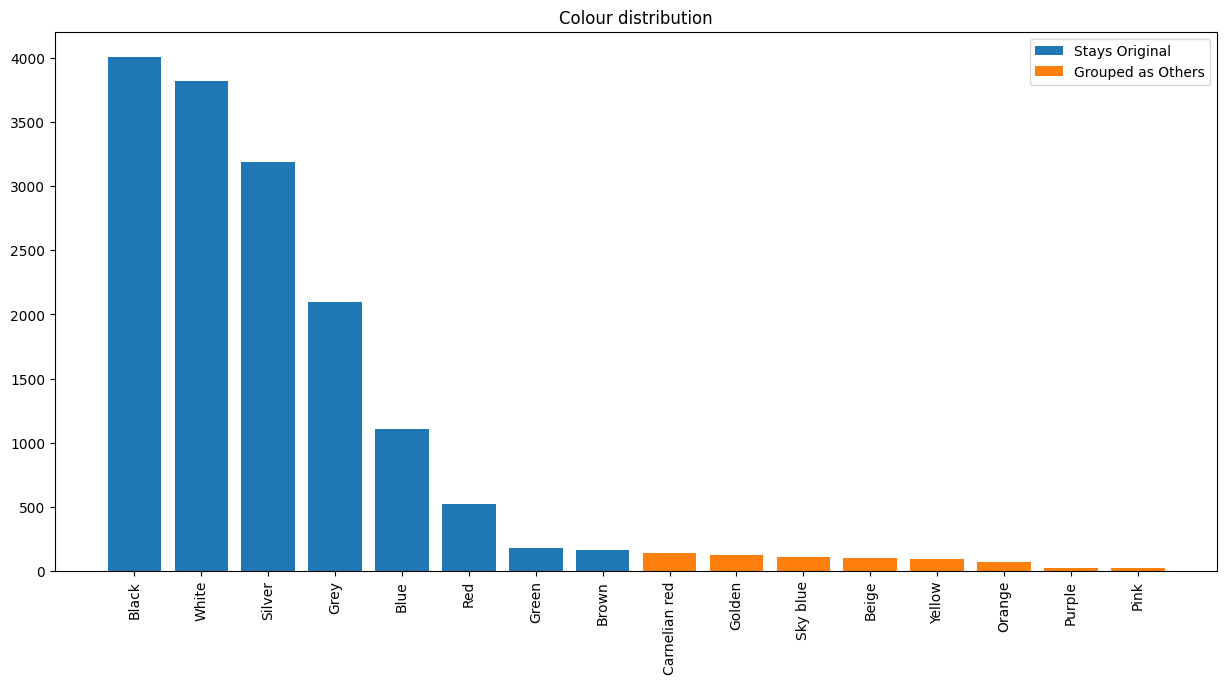

In [46]:
vc =new_df['Color'].value_counts()
min_counts = len(new_df['Color'])/100 #1% of data length
color_vc =  dict()
color_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        color_vc[vc.index[i]] = vc.values[i]
        color_vc_full[vc.index[i]] = 0
    else:
        color_vc[vc.index[i]] = 0
        color_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(color_vc_full)), list(color_vc_full.values()), align='center')
plt.bar(range(len(color_vc)), list(color_vc.values()), align='center')
plt.xticks(range(len(color_vc)), list(color_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Colour distribution')
plt.show()

In [47]:
for key, val in color_vc_full.items():
    if color_vc_full[key] == 0:
        color_vc_full[key] = 'Others'
    else:
        color_vc_full[key] = key

new_df['Color'] = new_df['Color'].map(color_vc_full)
new_df['Color'].unique()

array(['Silver', 'Black', 'White', 'Grey', 'Blue', 'Red', 'Others',
       'Green', 'Brown'], dtype=object)

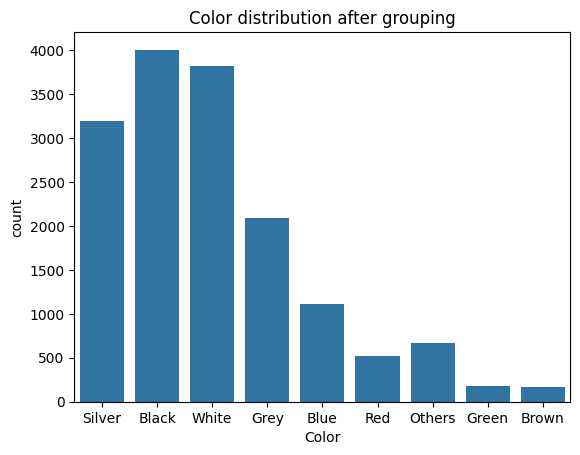

In [48]:
plt.title('Color distribution after grouping')
sns.countplot(x=new_df['Color'])
plt.show()

In [49]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">
Analyzing "Fuel type" variable<br>
organizing value counts in a way they are easy to visualize
<hr>

In [50]:
vc =new_df['Fuel type'].value_counts()
fuel_vc =  dict()
for i in range(len(new_df['Fuel type'].value_counts())):
    if len(vc)%2 != 0:
        if i == 0 :
            fuel_vc[vc.index[i]] = vc.values[i]
        elif vc.values[i] == vc.values[-i]:
            fuel_vc[vc.index[i]] = vc.values[i]
            break
        else :
            fuel_vc[vc.index[i]] = vc.values[i]
            fuel_vc[vc.index[-i]] = vc.values[-i]

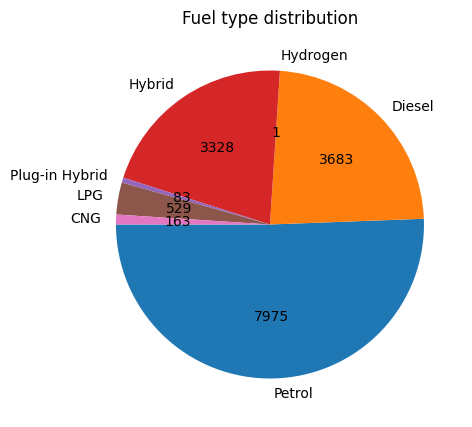

In [51]:
plt.figure(figsize=(5,5))
plt.pie(x=list(fuel_vc.values()),labels=list(fuel_vc.keys()),autopct=lambda pct: f"{round(pct/100.*sum(fuel_vc.values()))}",startangle=180)
plt.title('Fuel type distribution')
plt.show()

<hr><p style="font-family: verdona;"><b>Observations:<br></b>
1. Popularity:<br>
✦Petrol vehicles are by far the most common, making up the majority of the dataset (9,309 vehicles).<br>
✦Hybrid and Diesel vehicles are the next most common, with similar counts (3,495 and 3,634 respectively).<br>
✦Alternative fuel types (CNG, LPG, Plug-in Hybrid, Hydrogen) are much less common.<br>
2. Rare Fuel Types:<br>
✦Hydrogen vehicles are extremely rare in this dataset, with only 1 entry.<br>
✦Plug-in Hybrids are also relatively uncommon, with only 83 entries.<br>
3. Sample Size Considerations:<br>
✦The low count for Hydrogen vehicles (just 1) means its price data is not statistically significant.<br>
✦The small sample size for Plug-in Hybrids (83) suggests their price data might be less reliable than for more common fuel types.<br>

<p style="font-family: verdona;"><b>Conclusion:</b><br>
We can group the fuel types 'Plug-in Hybrid' and 'Hydrogen' into a single category called 'Other' for several reasons:
<p style="font-family: verdona;">
1. Low representation: Together, they account for less than 0.5% of the total records <br>(1 Hydrogen and 83 Plug-in Hybrid vehicles out of the total dataset).<br>
2. Model impact: Given their small representation, combining these categories is unlikely to significantly impact our model's performance.<br>
3. Simplification: This grouping will simplify our analysis without sacrificing meaningful information.<br>
<p style="font-family: verdona;">
By consolidating these less common fuel types, we can streamline our data while maintaining the integrity of our model and analysis.<hr>

In [52]:
new_df.replace({'Plug-in Hybrid':'Other', 'Hydrogen': 'Other'}, inplace=True)
new_df['Fuel type'].value_counts()

Fuel type
Petrol    7975
Diesel    3683
Hybrid    3328
LPG        529
CNG        163
Other       84
Name: count, dtype: int64

In [53]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Drive wheels" feature<hr>

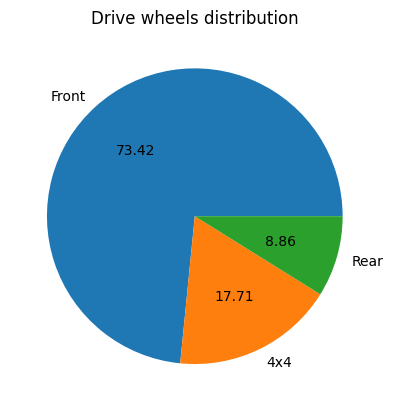

In [54]:
dw_vc = new_df['Drive wheels'].value_counts()
plt.pie(x=dw_vc.values, labels=dw_vc.index, autopct='%.2f')
plt.title('Drive wheels distribution')
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
1. The Drive wheels categories are imbalanced still each category has sufficient  distribution to train the model.<br>

<p style="font-family: verdona;"><b>Conclusion :</b><br>
The Drive wheels features needs to be One hot encoded only, no other changes are required.<hr>

In [55]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Gear box type" feature<hr>

In [56]:
new_df['Gear box type'].describe()

count         15762
unique            4
top       Automatic
freq          11500
Name: Gear box type, dtype: object

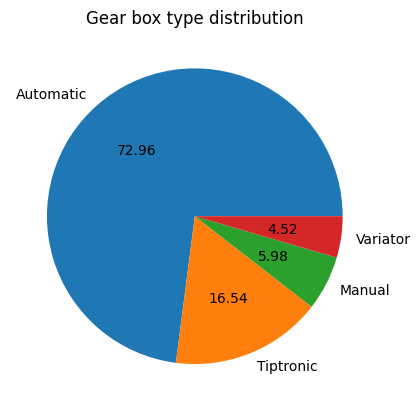

In [57]:
gbt_vc = new_df['Gear box type'].value_counts()
plt.pie(labels=gbt_vc.index, x=gbt_vc.values, autopct='%.2f')
plt.title('Gear box type distribution')
plt.show() 

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
1. The data is imbalanced, majority distribution is occupied by 'Automatic' - Gear box type but all types share good amount of data.

<p style="font-family: verdona;"><b>Conclusion :</b><br>
There is no need of doing other changes than one hot encoding<hr>

In [58]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Category" variable<hr>

In [59]:
new_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Pickup',
       'Limousine'], dtype=object)

C:\Users\antho\AppData\Local\Temp\ipykernel_13792\1498057975.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)


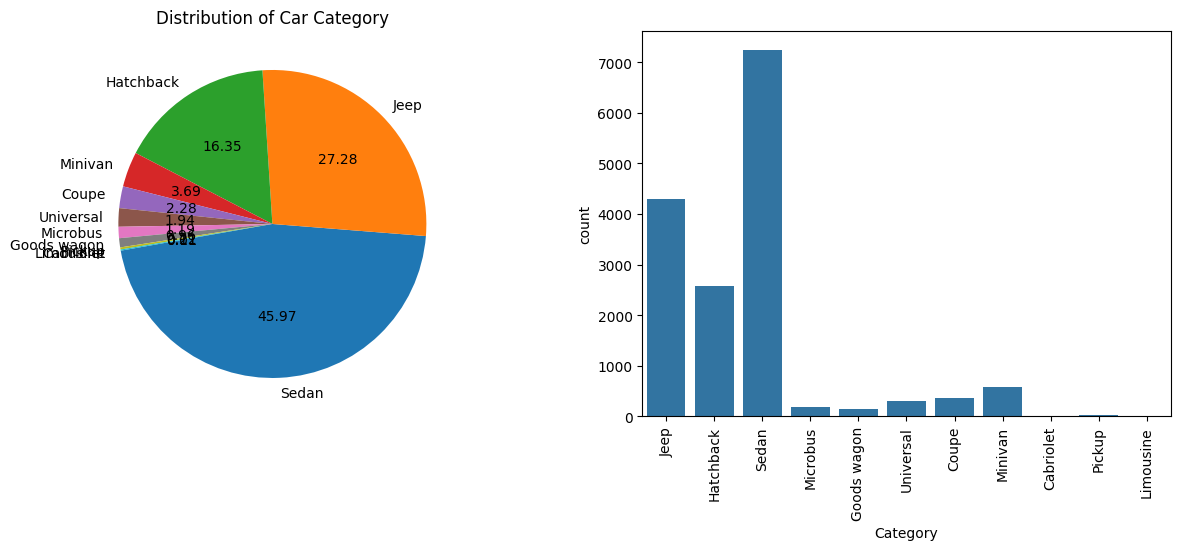

In [60]:
cat_vc = new_df['Category'].value_counts()
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Distribution of Car Category')
axes[0].pie(x=cat_vc.values, labels=cat_vc.index, autopct='%.2f', startangle=190)
sns.countplot(x=new_df['Category'], ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation :</b><br>
There exists some categories of cars which have very less share in the distribution including Pickup,Cabriolet and Limousine.

<p style="font-family: verdona;"><b>Conclusion :</b><br>
We will have to group the categories with less than 2%(based on visualization) records as Others because the model will make poor predictions on this data.<hr>

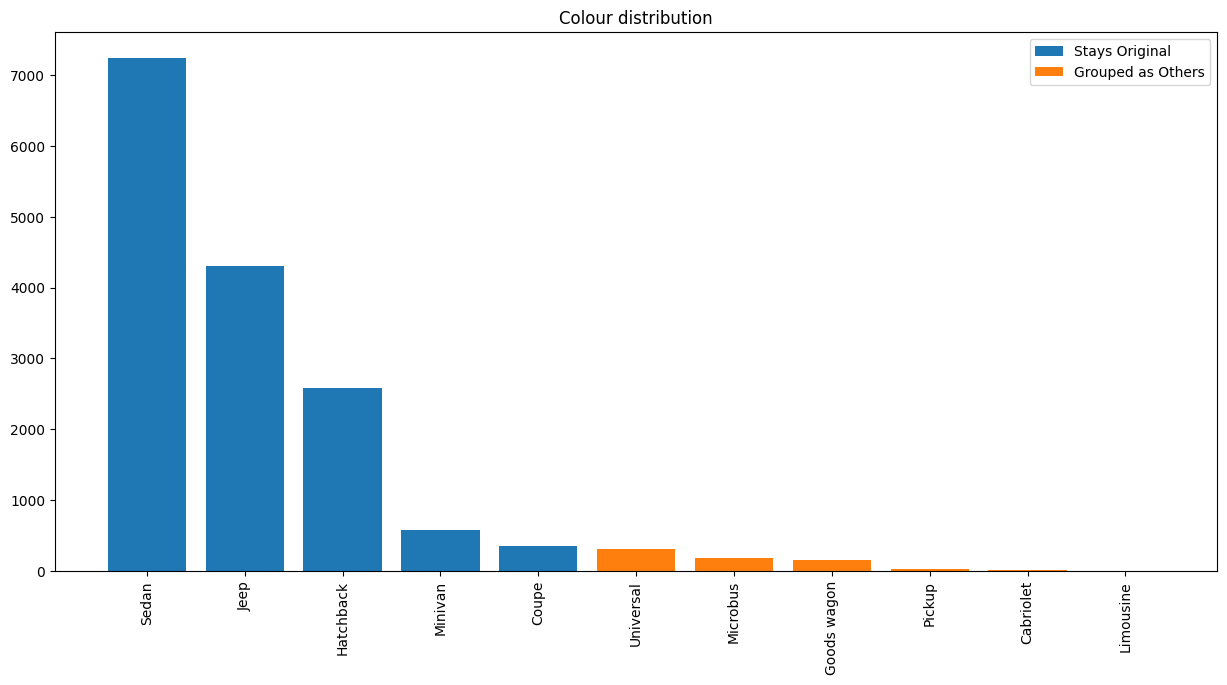

In [61]:
vc =new_df['Category'].value_counts()
min_counts = len(new_df['Category'])/50 #2% of data length
cat_vc =  dict()
cat_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        cat_vc[vc.index[i]] = vc.values[i]
        cat_vc_full[vc.index[i]] = 0
    else:
        cat_vc[vc.index[i]] = 0
        cat_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(cat_vc_full)), list(cat_vc_full.values()), align='center')
plt.bar(range(len(cat_vc)), list(cat_vc.values()), align='center')
plt.xticks(range(len(cat_vc)), list(cat_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Colour distribution')
plt.show()

In [62]:
for key, val in cat_vc_full.items():
    if cat_vc_full[key] == 0:
        cat_vc_full[key] = 'Others'
    else:
        cat_vc_full[key] = key

new_df['Category'] = new_df['Category'].map(cat_vc_full)
new_df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Others', 'Coupe', 'Minivan'],
      dtype=object)

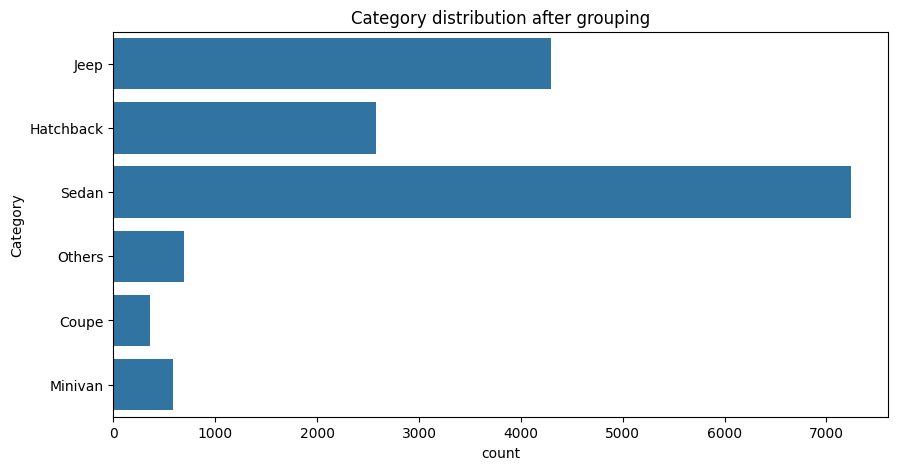

In [63]:
plt.figure(figsize=(10,5))
plt.title('Category distribution after grouping')
sns.countplot(y=new_df['Category'])
plt.show()

In [64]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">Analyzing "Manufacturer" & "Model" features together<hr>

In [65]:
new_df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'PORSCHE', 'JEEP', 'VOLKSWAGEN', 'AUDI',
       'RENAULT', 'NISSAN', 'BMW', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'OPEL', 'ACURA', 'CITROEN', 'MINI',
       'DODGE', 'JAGUAR', 'VAZ', 'SKODA', 'LAND ROVER', 'CHRYSLER',
       'LINCOLN', 'BUICK', 'DAIHATSU', 'PEUGEOT', 'VOLVO', 'სხვა',
       'HAVAL', 'CADILLAC', 'SCION', 'MERCURY', 'SEAT', 'LANCIA',
       'MASERATI', 'SAAB', 'GAZ', 'HUMMER', 'PONTIAC', 'SATURN',
       'GREATWALL'], dtype=object)

<hr><p style="font-family: verdona;">სხვა means Other in Georgian<hr>

In [66]:
def lowercase(row_val):
    return row_val.lower().strip()

In [67]:
new_df['Manufacturer'] = new_df['Manufacturer'].replace('სხვა','OTHER')
new_df['Manufacturer'] = new_df['Manufacturer'].apply(lowercase)
new_df['Manufacturer'].unique()

array(['lexus', 'chevrolet', 'honda', 'ford', 'hyundai', 'toyota',
       'mercedes-benz', 'porsche', 'jeep', 'volkswagen', 'audi',
       'renault', 'nissan', 'bmw', 'subaru', 'daewoo', 'kia',
       'mitsubishi', 'ssangyong', 'mazda', 'gmc', 'fiat', 'infiniti',
       'alfa romeo', 'suzuki', 'opel', 'acura', 'citroen', 'mini',
       'dodge', 'jaguar', 'vaz', 'skoda', 'land rover', 'chrysler',
       'lincoln', 'buick', 'daihatsu', 'peugeot', 'volvo', 'other',
       'haval', 'cadillac', 'scion', 'mercury', 'seat', 'lancia',
       'maserati', 'saab', 'gaz', 'hummer', 'pontiac', 'saturn',
       'greatwall'], dtype=object)

In [68]:
print('Total Unique Manufacturers : ', len(new_df['Manufacturer'].unique()))

Total Unique Manufacturers :  54


In [69]:
print('(Before Cleaning) Total Unique Models : ', len(new_df['Model'].unique()))

(Before Cleaning) Total Unique Models :  1236


In [70]:
for model in list(new_df['Manufacturer'].unique()):
    print(list(new_df[new_df['Manufacturer'] == model]['Model'].unique()))

['RX 450', 'RX 350', 'NX 300', 'CT 200h', 'GS 350', 'RX 400', 'NX 200', 'RX 300', 'RX 400 HYBRID', 'HS 250h Hybrid', 'ES 350', 'IS 200', 'ES 300', 'IS 250', 'IS 350', 'HS 250h', 'CT 200h F-sport', 'RX 350 F sport', 'RX 450 H', 'CT 200h F SPORT', 'RC F', 'IS 250 რესტაილინგი', 'RX 400 RESTAILING', 'IS 300', 'GS 300', 'IS 250 TURBO', 'GS 450', 'RX 450 HYBRID', 'RC F F SPORT', 'ES 300 hybrid', 'IS 350 C', 'CT 200h 1.8', 'RX 400 hybrid', 'CT 200h F sport', 'RX 400 H', 'RX 450 F SPORT']
['Equinox', 'Cruze LT', 'Captiva', 'Cruze', 'Orlando', 'Volt', 'Malibu', 'Lacetti', 'Aveo', 'Matiz', 'Spark', 'Impala', 'Cruze ltz', 'Cruze LTZ', 'Cruze strocna', 'Volt premier', 'Cruze Premier', '1500', 'Equinox LT', 'Cruze RS', 'Sonic', 'Cruze LS', 'Cruze sonic', 'Nubira', 'Cruze L T', 'Malibu LT', 'Malibu eco', 'HHR', 'Cruze Cruze', 'Malibu Hybrid', 'Trax', 'Volt Full Packet', 'Volt PREMIER', 'Sonic LT', 'Corvette', 'Cruze PREMIER', 'Camaro', 'Niva', 'Volt Premier', 'Cruze LT RS', 'Kalos', 'Cruze S']
['FIT

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
1. Here we can see multiple presence of the same model in different cases(upper-lower) which is making a single model as two different models .<br>
2. Also we can see that the base model variants are containing the precise model name along with its fuel type, turbo availability, engine vol, etc. 

<p style="font-family: verdona;"><b>Conclusion :</b><br>
1. To eliminate same model name occurance in different cases we will lowercase and strip all the model names so we can eliminate duplication of models due to case sensitivity.<br>
2. We will have to take a deep look into the model names for each manufacturer to capture the format of extracting the base models and group its variants like limited edition  . <hr>

In [71]:
new_df['Model'] = new_df['Model'].apply(lowercase)

In [72]:
for id, manufacturer in enumerate(list(new_df['Manufacturer'].unique())):
    models = list(new_df[new_df['Manufacturer'] == manufacturer]['Model'].unique())
    base_models = list()
    if manufacturer == 'lexus':
        for model in models:
            base_models.append(model[:6])
    elif manufacturer == 'mercedes-benz':
        for model in models:
            l1 = list()
            for char in model:
                if char.isdigit():
                    l1.append(char)
                    if len(l1) == 3:
                        break
            splitter = str()
            for element in l1 :
                splitter= splitter + str(element)

            if len(l1) == 3 :
                bm = model.split(splitter)[0] + splitter
            else : 
                bm = model.split(' ')[0]
            base_models.append(bm)
    elif manufacturer == 'fiat':
        for model in models :
            if '500' in model:
                bm = '500'
            else :
                bm = model.split(' ')[0]
            base_models.append(bm)
    else :
        for model in models:
            base_models.append(model.split(' ')[0])

    print('Manufacturer : ', manufacturer, '\n Models - ', models,
          '\n Base models - ', base_models)

    models_map = dict()
    for i,j in zip(models, base_models):
        models_map[i] = j

    # Used this initialy for verification and integrating modifications accordingly in the conditional statements
    # user = input('Verify : y(approve and continue) n(break)')
    # if user == 'y':
    #     pass
    # else :
    #     break

    new_df['Model'] = new_df['Model'].replace(models_map)


Manufacturer :  lexus 
 Models -  ['rx 450', 'rx 350', 'nx 300', 'ct 200h', 'gs 350', 'rx 400', 'nx 200', 'rx 300', 'rx 400 hybrid', 'hs 250h hybrid', 'es 350', 'is 200', 'es 300', 'is 250', 'is 350', 'hs 250h', 'ct 200h f-sport', 'rx 350 f sport', 'rx 450 h', 'ct 200h f sport', 'rc f', 'is 250 რესტაილინგი', 'rx 400 restailing', 'is 300', 'gs 300', 'is 250 turbo', 'gs 450', 'rx 450 hybrid', 'rc f f sport', 'es 300 hybrid', 'is 350 c', 'ct 200h 1.8', 'rx 400 h', 'rx 450 f sport'] 
 Base models -  ['rx 450', 'rx 350', 'nx 300', 'ct 200', 'gs 350', 'rx 400', 'nx 200', 'rx 300', 'rx 400', 'hs 250', 'es 350', 'is 200', 'es 300', 'is 250', 'is 350', 'hs 250', 'ct 200', 'rx 350', 'rx 450', 'ct 200', 'rc f', 'is 250', 'rx 400', 'is 300', 'gs 300', 'is 250', 'gs 450', 'rx 450', 'rc f f', 'es 300', 'is 350', 'ct 200', 'rx 400', 'rx 450']
Manufacturer :  chevrolet 
 Models -  ['equinox', 'cruze lt', 'captiva', 'cruze', 'orlando', 'volt', 'malibu', 'lacetti', 'aveo', 'matiz', 'spark', 'impala', 'c

In [73]:
print('Total unique models : ', len(new_df['Model'].unique()))

Total unique models :  550


<hr><p style="font-family: verdona;">We can see here we have significantly reduced the number of unique models which will prove beneficial as the prices of the variant model wont have much difference and each variant model wont have many records to be able to strengthen the prediction accuracy of the model.<br><br> 
Also the names of the model wont be a differenciator among prices the other features would be for example a limited edition model might have a higher engine volume so the model know the car's price is high because it has a higher engine volume and not because of the name of the model .<hr>

In [74]:
new_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,lexus,rx 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,chevrolet,equinox,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,honda,fit,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,ford,escape,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,honda,fit,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


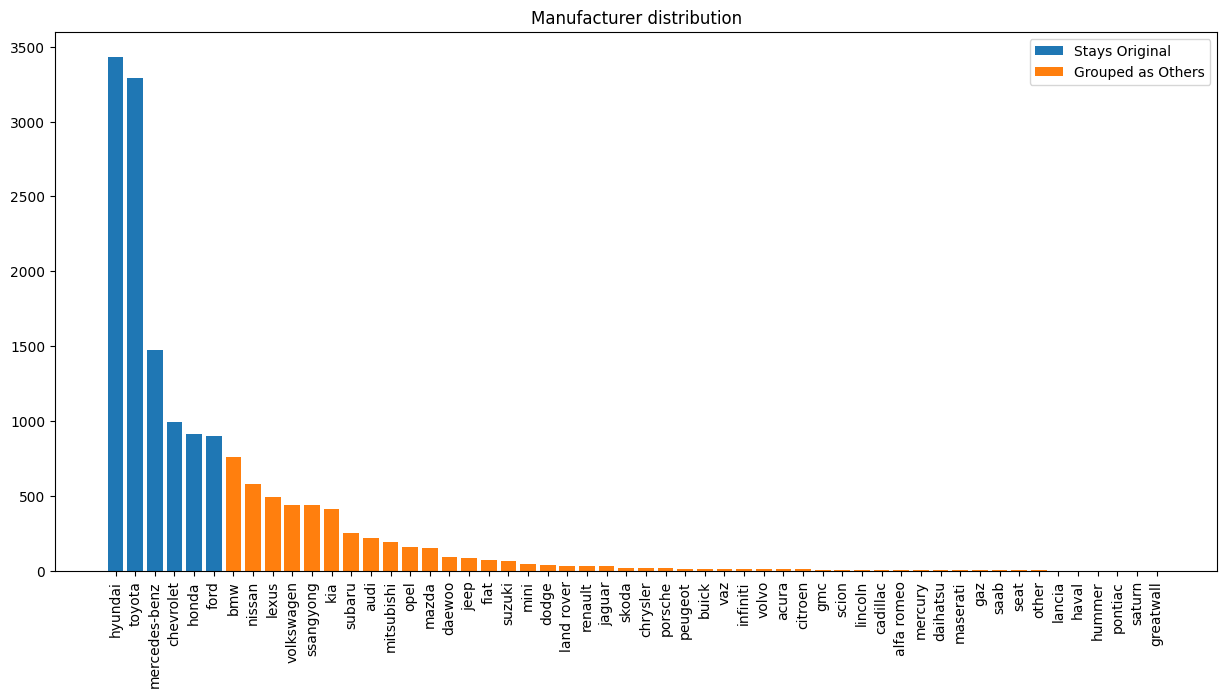

In [75]:
vc =new_df['Manufacturer'].value_counts()
min_counts = len(new_df['Manufacturer'])/20 #5% of data length
man_vc =  dict()
man_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        man_vc[vc.index[i]] = vc.values[i]
        man_vc_full[vc.index[i]] = 0
    else:
        man_vc[vc.index[i]] = 0
        man_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(man_vc_full)), list(man_vc_full.values()), align='center')
plt.bar(range(len(man_vc)), list(man_vc.values()), align='center')
plt.xticks(range(len(man_vc)), list(man_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Manufacturer distribution')
plt.show()

In [76]:
man_vc = new_df['Manufacturer'].value_counts()
limit = len(new_df)//20 # 5% length of data
others = list()
sum = 0
for i, j in zip(man_vc.values, man_vc.index):
    if i <= limit:
        print(i,j)
        others.append(j)
        sum = sum + i
print(sum)

760 bmw
579 nissan
491 lexus
441 volkswagen
436 ssangyong
413 kia
249 subaru
218 audi
194 mitsubishi
157 opel
150 mazda
91 daewoo
87 jeep
73 fiat
62 suzuki
47 mini
39 dodge
32 land rover
30 renault
29 jaguar
18 skoda
17 chrysler
16 porsche
14 peugeot
13 buick
13 vaz
13 infiniti
13 volvo
11 acura
9 citroen
8 gmc
7 scion
6 lincoln
6 cadillac
4 alfa romeo
4 mercury
4 daihatsu
3 maserati
2 gaz
2 saab
2 seat
2 other
1 lancia
1 haval
1 hummer
1 pontiac
1 saturn
1 greatwall
4771


<hr><p style="font-family: verdona;">
 If there are less records for a manufacturer then by default their respective models will also be less, such that the model will not be able to predict the prices accurately. So we will have to group them as others in Manufacturer as well as Model feature.
<p style="font-family: verdona;">
 Also this will generalize the model predictions and not overfit according to the data.<hr>

In [77]:
def group_man(value):
    if value in others:
        return 'other'
    else :
        return value

In [78]:
new_df['Manufacturer'] =  new_df['Manufacturer'].apply(group_man)
print('Total uniques after grouping : ', new_df['Manufacturer'].unique())
new_df[new_df['Manufacturer'] == 'other']

Total uniques after grouping :  ['other' 'chevrolet' 'honda' 'ford' 'hyundai' 'toyota' 'mercedes-benz']


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,other,rx 450,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
8,26657,0,other,rx 350,2007,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,0,Silver,12,No,3.5
10,1019,1055,other,rx 450,2013,Jeep,Yes,Hybrid,138038,6.0,Automatic,Front,0,White,12,No,3.5
23,19444,915,other,cayenne,2014,Jeep,Yes,Diesel,175056,6.0,Automatic,4x4,0,White,12,No,3.0
25,24462,0,other,grand,2007,Jeep,Yes,Diesel,250000,6.0,Tiptronic,4x4,0,Black,10,Yes,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,15681,0,other,jetta,2013,Sedan,Yes,Petrol,81200,5.0,Manual,Front,0,Silver,12,No,2.5
15749,8781,0,other,caliber,2008,Hatchback,No,Petrol,0,4.0,Automatic,Front,0,Blue,4,No,2.4
15750,19130,0,other,optima,2014,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,0,Black,12,No,2.4
15751,8781,1107,other,combo,2007,Others,No,Diesel,236000,4.0,Manual,Front,0,Others,4,Yes,1.7


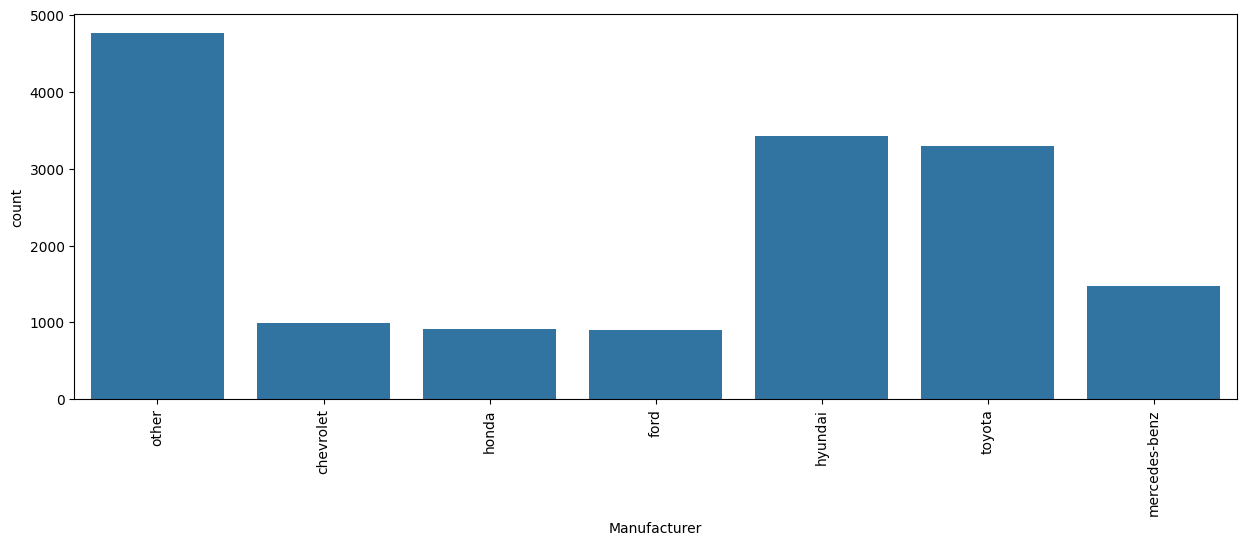

In [79]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_df['Manufacturer'])
plt.xticks(rotation=90)
plt.show()

In [80]:
new_df['Model'] = np.where(new_df['Manufacturer'] == 'other', 'other', new_df['Model'])
new_df[new_df['Model']=='other']

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,other,other,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
8,26657,0,other,other,2007,Jeep,Yes,Petrol,128500,6.0,Automatic,4x4,0,Silver,12,No,3.5
10,1019,1055,other,other,2013,Jeep,Yes,Hybrid,138038,6.0,Automatic,Front,0,White,12,No,3.5
23,19444,915,other,other,2014,Jeep,Yes,Diesel,175056,6.0,Automatic,4x4,0,White,12,No,3.0
25,24462,0,other,other,2007,Jeep,Yes,Diesel,250000,6.0,Tiptronic,4x4,0,Black,10,Yes,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15748,15681,0,other,other,2013,Sedan,Yes,Petrol,81200,5.0,Manual,Front,0,Silver,12,No,2.5
15749,8781,0,other,other,2008,Hatchback,No,Petrol,0,4.0,Automatic,Front,0,Blue,4,No,2.4
15750,19130,0,other,other,2014,Sedan,Yes,Petrol,35800,4.0,Automatic,Front,0,Black,12,No,2.4
15751,8781,1107,other,other,2007,Others,No,Diesel,236000,4.0,Manual,Front,0,Others,4,Yes,1.7


In [81]:
new_df['Model'].value_counts()

Model
other      4771
prius      1153
camry       965
elantra     941
sonata      825
           ... 
citan         1
hiace         1
clk 280       1
g             1
slk 350       1
Name: count, Length: 229, dtype: int64

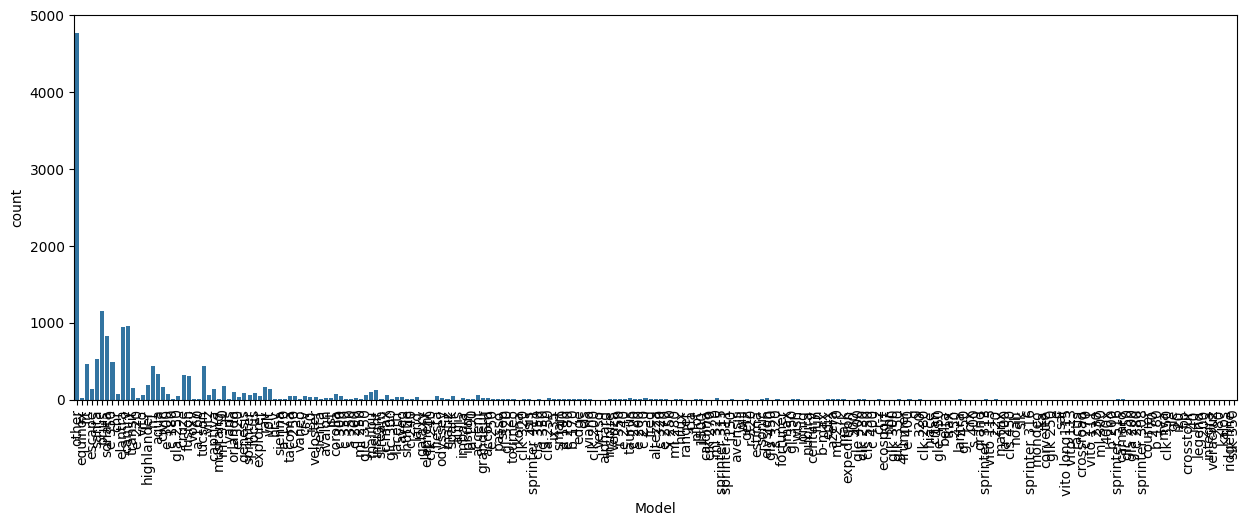

In [82]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_df['Model'])
plt.xticks(rotation=90)
plt.show()

<hr><p style="font-family: verdona;">We will need to do the same thing for model feature i.e. grouping<hr>

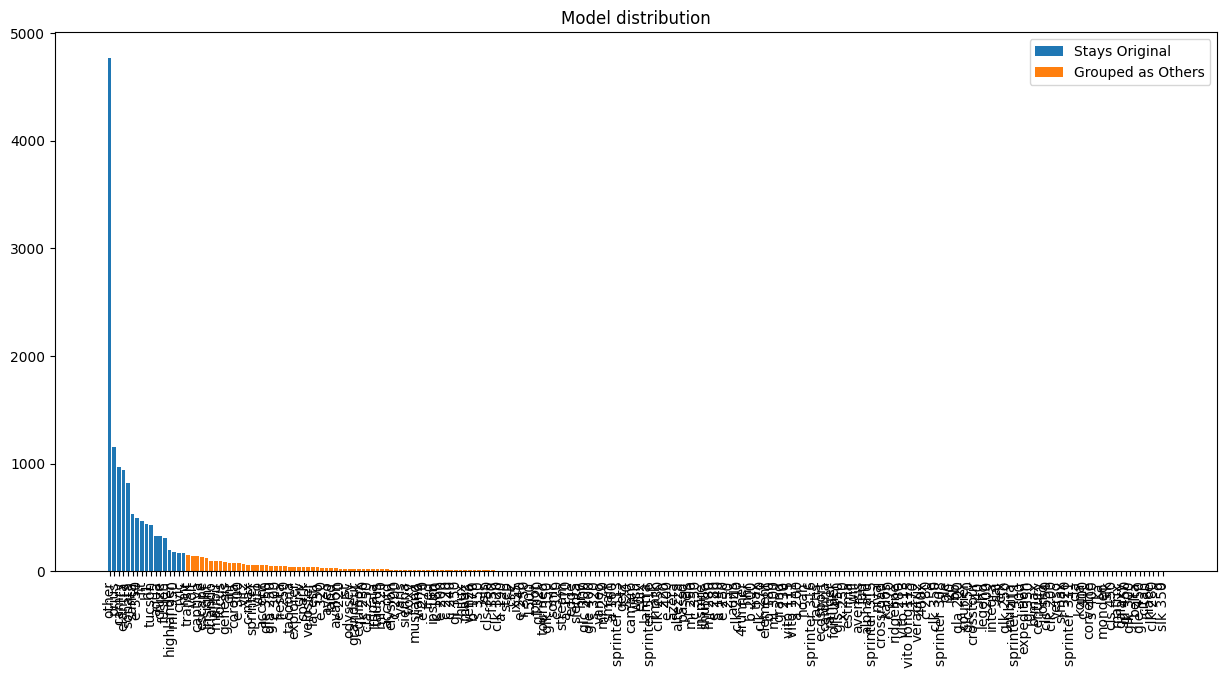

In [83]:
vc =new_df['Model'].value_counts()
min_counts = len(new_df['Model'])/100 #1% of data length
mod_vc =  dict()
mod_vc_full = dict()

for i in range(len(vc)):
    if vc.values[i] < min_counts:
        mod_vc[vc.index[i]] = vc.values[i]
        mod_vc_full[vc.index[i]] = 0
    else:
        mod_vc[vc.index[i]] = 0
        mod_vc_full[vc.index[i]] = vc.values[i]

plt.figure(figsize=(15,7))
plt.bar(range(len(mod_vc_full)), list(mod_vc_full.values()), align='center')
plt.bar(range(len(mod_vc)), list(mod_vc.values()), align='center')
plt.xticks(range(len(mod_vc)), list(mod_vc.keys()),rotation=90)
plt.legend(['Stays Original','Grouped as Others'])
plt.title('Model distribution')
plt.show()

In [84]:
for key, val in mod_vc_full.items():
    if mod_vc_full[key] == 0:
        mod_vc_full[key] = 'other'
    else:
        mod_vc_full[key] = key

new_df['Model'] = new_df['Model'].map(mod_vc_full)
new_df['Model'].unique()

array(['other', 'fit', 'santa', 'prius', 'sonata', 'e 350', 'elantra',
       'camry', 'highlander', 'h1', 'aqua', 'civic', 'cruze', 'fusion',
       'tucson', 'ml 350', 'rav'], dtype=object)

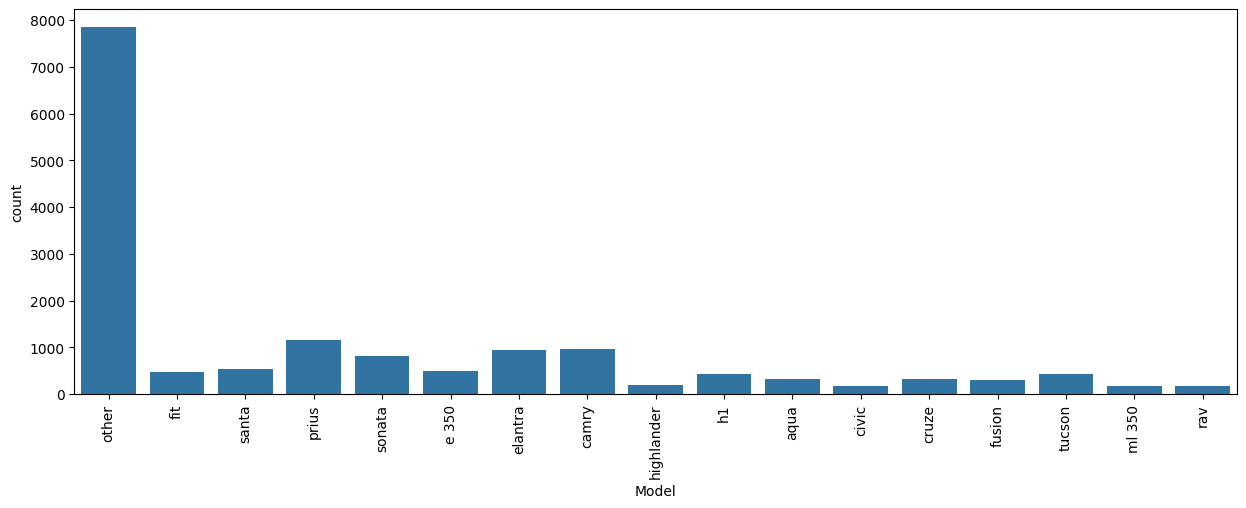

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x=new_df['Model'])
plt.xticks(rotation=90)
plt.show()

<hr><p style="font-family: verdona;"><b>Observation : </b><br>
We can visualize that model name feature is highly imbalanced .

<p style="font-family: verdona;"><b>Conclusion : </b><br>
Its better to drop this feature as it can affect the models prediction.<hr>

In [86]:
new_df.drop(columns=['Model'], inplace=True)
new_df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,other,2010,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,chevrolet,2011,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,honda,2006,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,ford,2011,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,honda,2014,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<hr><p style="font-family: verdona;">As the vehical can have any production year that our data might not have so we will put the production years in buckets of each decade.<hr>

In [87]:
a = list(new_df['Prod. year'])
print(a)
a.sort()
print('most old : ', a[0], ' most recent : ',a[-1])

[2010, 2011, 2006, 2011, 2014, 2016, 2010, 2013, 2007, 2014, 2013, 2016, 2018, 2016, 2016, 2012, 2012, 2017, 2001, 2006, 2008, 2011, 2007, 2014, 2008, 2007, 2011, 2019, 2010, 2012, 2013, 2016, 2016, 2014, 2012, 2017, 2012, 2008, 2016, 2015, 2008, 2017, 2014, 2001, 2019, 2015, 2012, 2018, 2013, 2007, 2013, 2004, 2013, 2014, 2016, 2013, 2001, 2015, 2011, 2017, 2016, 2011, 2016, 2014, 2012, 2009, 2010, 2019, 2014, 2012, 2012, 2014, 2012, 2010, 2012, 2012, 2008, 2016, 2013, 2004, 2009, 2014, 2015, 2004, 2007, 2015, 2013, 2013, 2016, 2008, 2017, 2016, 2010, 2005, 2003, 2013, 2010, 2013, 2014, 2009, 2015, 2012, 2014, 2016, 2014, 2008, 2012, 2008, 2011, 2012, 2013, 2017, 2014, 2014, 2013, 2018, 2015, 2011, 2014, 2005, 2013, 2016, 2010, 2014, 2012, 2016, 2012, 2016, 2008, 2018, 2013, 2014, 2018, 2009, 2011, 2015, 2012, 2017, 2019, 2016, 2014, 2011, 2003, 2016, 2001, 2014, 2011, 2012, 2014, 2005, 2014, 2004, 2018, 2014, 2014, 2002, 2013, 2013, 2013, 2014, 2012, 2001, 2011, 2008, 2015, 2001, 200

<hr><p style="font-family: verdona;"><b>
production year buckets - <br>
1940-1950 : 0<br>
1951-1960 : 1<br>
1961-1970 : 2<br>
1971-1980 : 3<br>
1981-1990 : 4<br>
1991-2000 : 5<br>
2001-2010 : 6<br>
2011-2020 : 7
<hr><p style="font-family: verdona;">

In [88]:
def bucket_years(val):
    if val in range(1900,1950):
        return 0
    elif val in range(1951,1960):
        return 1
    elif val in range(1961,1970):
        return 2
    elif val in range(1971,1980):
        return 3
    elif val in range(1981,1990):
        return 4
    elif val in range(1991,2000):
        return 5
    elif val in range(2001,2010):
        return 6
    else : 
        return 7

In [89]:
new_df['Prod. year'] = new_df['Prod. year'].apply(bucket_years)
new_df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,other,7,Jeep,Yes,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,No,3.5
1,16621,1018,chevrolet,7,Jeep,No,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,No,3.0
2,8467,0,honda,6,Hatchback,No,Petrol,200000,4.0,Variator,Front,1,Black,2,No,1.3
3,3607,862,ford,7,Jeep,Yes,Hybrid,168966,4.0,Automatic,4x4,0,White,0,No,2.5
4,11726,446,honda,7,Hatchback,Yes,Petrol,91901,4.0,Automatic,Front,0,Silver,4,No,1.3


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Encoding Categoric to Numeric data

<hr><center><p style="font-family: verdona;"><b>Label encoding</b></center><hr>

In [90]:
new_df['Leather interior'] = new_df['Leather interior'].map({'Yes':1.0,'No':0.0})
new_df['Turbo'] = new_df['Turbo'].map({'Yes':1.0,'No':0.0})
new_df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Turbo,Engine Volume
0,13328,1399,other,7,Jeep,1.0,Hybrid,186005,6.0,Automatic,4x4,0,Silver,12,0.0,3.5
1,16621,1018,chevrolet,7,Jeep,0.0,Petrol,192000,6.0,Tiptronic,4x4,0,Black,8,0.0,3.0
2,8467,0,honda,6,Hatchback,0.0,Petrol,200000,4.0,Variator,Front,1,Black,2,0.0,1.3
3,3607,862,ford,7,Jeep,1.0,Hybrid,168966,4.0,Automatic,4x4,0,White,0,0.0,2.5
4,11726,446,honda,7,Hatchback,1.0,Petrol,91901,4.0,Automatic,Front,0,Silver,4,0.0,1.3


<hr><center><p style="font-family: verdona;"><b>One hot encoding</b></center><hr> 

In [91]:
new_df = pd.get_dummies(data=new_df, columns=['Manufacturer','Category', 'Fuel type','Gear box type','Drive wheels','Color'], dtype=float, drop_first=True)
new_df.head()

,Price,Levy,Prod. year,Leather interior,Mileage,Cylinders,Wheel,Airbags,Turbo,Engine Volume,...,Drive wheels_Front,Drive wheels_Rear,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Others,Color_Red,Color_Silver,Color_White
0,13328,1399,7,1.0,186005,6.0,0,12,0.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,1018,7,0.0,192000,6.0,0,8,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0,6,0.0,200000,4.0,1,2,0.0,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862,7,1.0,168966,4.0,0,0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11726,446,7,1.0,91901,4.0,0,4,0.0,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15762 entries, 0 to 15761
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Price                       15762 non-null  int64  
 1   Levy                        15762 non-null  int32  
 2   Prod. year                  15762 non-null  int64  
 3   Leather interior            15762 non-null  float64
 4   Mileage                     15762 non-null  int64  
 5   Cylinders                   15762 non-null  float64
 6   Wheel                       15762 non-null  int64  
 7   Airbags                     15762 non-null  int64  
 8   Turbo                       15762 non-null  float64
 9   Engine Volume               15762 non-null  float64
 10  Manufacturer_ford           15762 non-null  float64
 11  Manufacturer_honda          15762 non-null  float64
 12  Manufacturer_hyundai        15762 non-null  float64
 13  Manufacturer_mercedes-benz  157

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Scaling data

In [93]:
scaling_cols = list()
for col in new_df.columns:
    if col != 'Price' :
        max_val = max(list(new_df[col]))
        if max_val > 1.0:
            scaling_cols.append(col)
            print(' Feature : ', col,'\t Max value :  ',max_val)

 Feature :  Levy 	 Max value :   2278
 Feature :  Prod. year 	 Max value :   7
 Feature :  Mileage 	 Max value :   353049
 Feature :  Cylinders 	 Max value :   16.0
 Feature :  Airbags 	 Max value :   16
 Feature :  Engine Volume 	 Max value :   3.5


In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [95]:
scaled_df = pd.DataFrame(scaler.fit_transform(new_df[scaling_cols]), columns=scaling_cols)
scaled_df.head()

,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine Volume
0,1.728106,0.505704,0.788337,1.830002,1.23192,2.242423
1,0.880051,0.505704,0.866374,1.830002,0.28492,1.412948
2,-1.385883,-1.977443,0.970511,-0.416454,-1.13558,-1.407265
3,0.532815,0.505704,0.566539,-0.416454,-1.60908,0.583474
4,-0.393146,0.505704,-0.436624,-0.416454,-0.66208,-1.407265


In [96]:
new_df.drop(columns=scaling_cols, inplace=True)
new_df.head()

,Price,Leather interior,Wheel,Turbo,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,Manufacturer_toyota,...,Drive wheels_Front,Drive wheels_Rear,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Others,Color_Red,Color_Silver,Color_White
0,13328,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,16621,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,11726,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
cols = new_df.columns.tolist()
cols.extend(scaled_df.columns)
cols

['Price',
 'Leather interior',
 'Wheel',
 'Turbo',
 'Manufacturer_ford',
 'Manufacturer_honda',
 'Manufacturer_hyundai',
 'Manufacturer_mercedes-benz',
 'Manufacturer_other',
 'Manufacturer_toyota',
 'Category_Hatchback',
 'Category_Jeep',
 'Category_Minivan',
 'Category_Others',
 'Category_Sedan',
 'Fuel type_Diesel',
 'Fuel type_Hybrid',
 'Fuel type_LPG',
 'Fuel type_Other',
 'Fuel type_Petrol',
 'Gear box type_Manual',
 'Gear box type_Tiptronic',
 'Gear box type_Variator',
 'Drive wheels_Front',
 'Drive wheels_Rear',
 'Color_Blue',
 'Color_Brown',
 'Color_Green',
 'Color_Grey',
 'Color_Others',
 'Color_Red',
 'Color_Silver',
 'Color_White',
 'Levy',
 'Prod. year',
 'Mileage',
 'Cylinders',
 'Airbags',
 'Engine Volume']

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Clean data

In [98]:
import pandas as pd

result = pd.concat([new_df, scaled_df], axis=1, ignore_index=True)
result.columns = cols
print(result.shape)
result.head()

(15762, 39)


,Price,Leather interior,Wheel,Turbo,Manufacturer_ford,Manufacturer_honda,Manufacturer_hyundai,Manufacturer_mercedes-benz,Manufacturer_other,Manufacturer_toyota,...,Color_Others,Color_Red,Color_Silver,Color_White,Levy,Prod. year,Mileage,Cylinders,Airbags,Engine Volume
0,13328,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.728106,0.505704,0.788337,1.830002,1.23192,2.242423
1,16621,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.880051,0.505704,0.866374,1.830002,0.28492,1.412948
2,8467,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.385883,-1.977443,0.970511,-0.416454,-1.13558,-1.407265
3,3607,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.532815,0.505704,0.566539,-0.416454,-1.60908,0.583474
4,11726,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.393146,0.505704,-0.436624,-0.416454,-0.66208,-1.407265


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Handling Multicollinearity

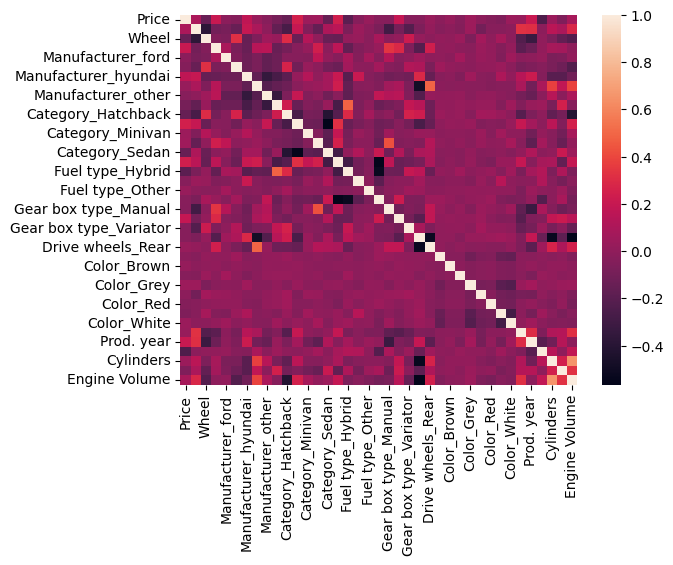

In [99]:
sns.heatmap(result.corr())
plt.show()

<hr><center><p style="font-family: verdona;">None of the features have more than 80% correlation which indicates, multicollinearity does not exist <hr>

In [100]:
X = result.drop(columns=['Price'])
y = result['Price']

print(X.shape, y.shape)

(15762, 38) (15762,)


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Train Test Split

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y,random_state=42,
                                                  test_size=0.2)

<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Model Building and Training

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

dtree = DecisionTreeRegressor(max_depth=10, ccp_alpha=0.3, max_leaf_nodes=75)
rforest = RandomForestRegressor()
gb = GradientBoostingRegressor()
ada_b = AdaBoostRegressor()
xgb = XGBRegressor()

In [103]:
dtree.fit(x_train,y_train)
rforest.fit(x_train,y_train)
xgb.fit(x_train,y_train)
gb.fit(x_train,y_train)
ada_b.fit(x_train,y_train)

AdaBoostRegressor()

In [104]:
xgb_preds = xgb.predict(x_test)
gb_preds = gb.predict(x_test)
ada_b_preds = ada_b.predict(x_test)
tree_preds = dtree.predict(x_test)
rforest_preds = rforest.predict(x_test)

In [105]:
prediction_df = pd.DataFrame()
prediction_df['Acutal'] = y_test
prediction_df['XGB Preds'] = xgb_preds
prediction_df['Dtree Preds'] = tree_preds
prediction_df['RForest Preds'] = rforest_preds
prediction_df['GB Preds'] = gb_preds
prediction_df['Ada_b Preds'] = ada_b_preds
prediction_df

,Acutal,XGB Preds,Dtree Preds,RForest Preds,GB Preds,Ada_b Preds
6156,470,20238.175781,9966.483871,6589.370000,14111.113261,43297.740118
5453,8154,9662.619141,7518.542652,8574.050000,6586.338778,25364.050337
15015,16778,18809.669922,19371.867359,16782.620000,21965.799339,37008.227338
3691,25889,25714.101562,19371.867359,22186.170000,21185.657288,32932.665025
13165,470,10561.363281,7808.130374,11843.147333,22433.825688,39908.007684
...,...,...,...,...,...,...
1705,4077,3886.351807,7518.542652,3865.370711,2704.212276,27363.504142
7495,43868,33544.781250,31834.384615,40636.140000,27344.079487,36139.316311
12273,18817,16022.005859,7518.542652,15763.020000,11760.697188,20383.376498
5942,15053,17532.804688,18853.355330,17496.750000,25185.771482,38901.881334


<div style="background-color: red;">
  <h1 style="font-family: Arial; color: cyan; text-align: center;">Model Evaluation

In [106]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error, mean_absolute_percentage_error

def cal_error(y_true, y_predict):
    print(f'r square: {r2_score(y_true, y_predict)}')
    print(f'mae: {mean_absolute_error(y_true, y_predict)}')
    print(f'mse root: {np.sqrt(mean_squared_error(y_true, y_predict))}')
    print(f'mape: {mean_absolute_percentage_error(y_true, y_predict)}')

print('\nXGB results ')
cal_error(y_test, xgb_preds)
print('\nRForest results ')
cal_error(y_test, rforest_preds)
print('\nDTree results ')
cal_error(y_test, tree_preds)
print('\nAda_b results ')
cal_error(y_test, ada_b_preds)
print('\nGB results ')
cal_error(y_test, gb_preds)


XGB results 
r square: 0.7314051257851631
mae: 5068.156746139914
mse root: 8639.543927383684
mape: 11.878955060871188

RForest results 
r square: 0.7559727633502256
mae: 4371.164177069861
mse root: 8234.95267907468
mape: 8.724398946712965

DTree results 
r square: 0.5618275621867667
mae: 7116.9159284417465
mse root: 11034.800472634666
mape: 8.328293395550665

Ada_b results 
r square: -0.673084521595197
mae: 18807.33404396049
mse root: 21562.58863303882
mape: 29.19999485097223

GB results 
r square: 0.5653973069598122
mae: 7038.036318805776
mse root: 10989.758868201996
mape: 12.88070630295008


<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Most Important features

In [107]:
imp_df = pd.DataFrame(data=rforest.feature_importances_, index=rforest.feature_names_in_, columns=['Value']).sort_values(by='Value')

imp_df

,Value
Color_Green,0.000206
Fuel type_Other,0.001139
Fuel type_LPG,0.001684
Gear box type_Manual,0.001697
Color_Red,0.001730
Color_Brown,0.001945
Category_Hatchback,0.002094
Gear box type_Variator,0.002124
Category_Minivan,0.002201
Category_Others,0.002738


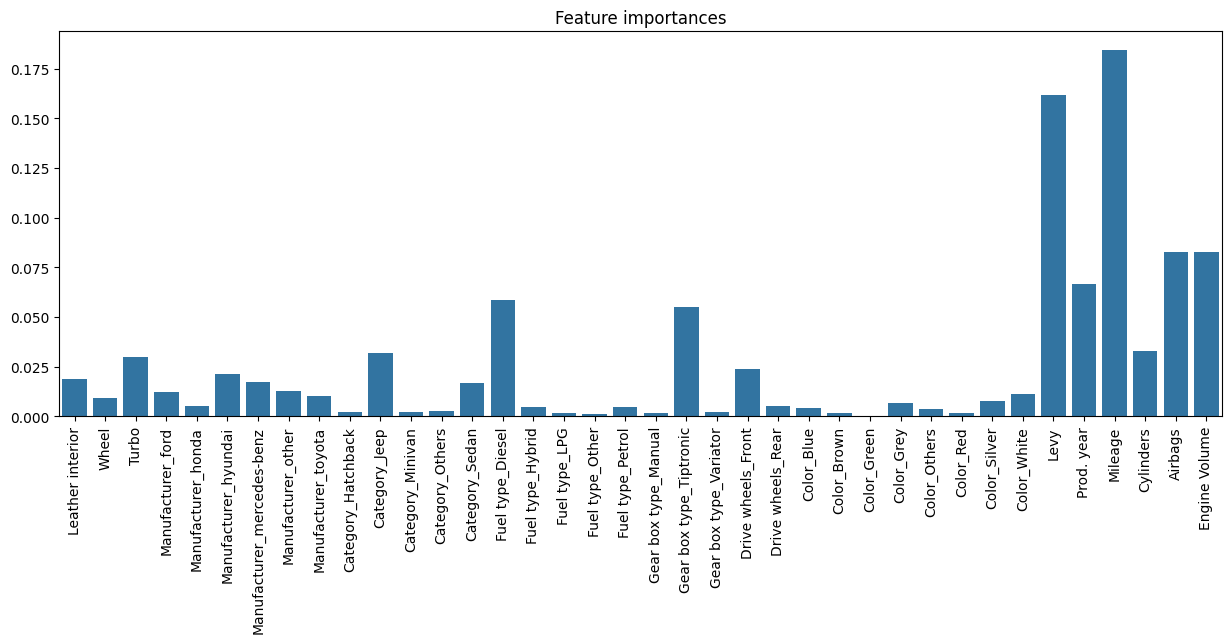

In [108]:
plt.figure(figsize=(15,5))
sns.barplot(x=rforest.feature_names_in_,y=rforest.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importances')
plt.show()

<div style="background-color: yellow;">
  <h3 style="font-family: Arial; color: blue; text-align: center;">Hyperparameter Tuning

In [110]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],                 
        # Number of trees in the forest
   'max_depth': [10, 20, 30, 40, 50],                 
        # Maximum depth of the tree
   'min_samples_split': [2, 5, 10, 15, 20],                 
        # Minimum number of samples required to split an internal node
   'min_samples_leaf': [1, 2, 4, 6, 8],                 
        # Minimum number of samples required to be at a leaf node
   'max_features': ['sqrt', 'log2', None],                 
        # Number of features to consider when looking for the best split
    'bootstrap': [True, False],                 
        # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, 
        param_distributions=param_grid, 
        n_iter=100,    # Number of parameter settings sampled
        cv=3,          # Cross-validation
        verbose=2,     # Increase output verbosity
        random_state=42, 
        n_jobs=-1,     # Use all available cores
        scoring='r2')  # Change scoring metric to R^2

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters found by RandomizedSearchCV
print("Best parameters found:", random_search.best_params_)

# Evaluate the model on test data
best_model = random_search.best_estimator_
score = best_model.score(x_test, y_test)
print("Test set score:", score)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}
Test set score: 0.7582312318897942


In [115]:
rforest = RandomForestRegressor(n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=40, bootstrap=False)

rforest.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=5, n_estimators=300)

In [119]:
rf_preds = rforest.predict(x_test)

array([ 6589.37 ,  8574.05 , 16782.62 , ..., 15763.02 , 17496.75 ,
       13949.578])

In [122]:
prediction_df = pd.DataFrame()
prediction_df['Acutal'] = y_test
prediction_df['RForest Preds'] = rf_preds
prediction_df

,Acutal,RForest Preds
6156,470,15662.314167
5453,8154,7231.874444
15015,16778,17347.058333
3691,25889,24447.375833
13165,470,12290.586667
...,...,...
1705,4077,3897.571429
7495,43868,40917.462778
12273,18817,15152.336944
5942,15053,17764.152222


In [121]:
print('\nRForest results ')
cal_error(y_test, rf_preds)


RForest results 
r square: 0.7572740425169988
mae: 4330.616775488468
mse root: 8212.966821064101
mape: 10.767940147153015


<hr><p style="font-family: verdona;">The model performace is almost the same<hr>

<div style="background-color: red;">
  <h2 style="font-family: Arial; color: cyan; text-align: center;">Building Pipeline